# Import

In [1]:
# import librosa
# import librosa.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from pydub import AudioSegment
import os
import math
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import csv
import japanize_matplotlib


In [4]:
toshi_ideal_df = pd.read_csv('datas/toshi_ideal_data.csv',skiprows=[0,1], header=None, usecols=[9, 10, 11], encoding="cp932")
toshi_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
toshi_ideal_vocals = toshi_ideal_df['ボーカル']
toshi_ideal_melodys = toshi_ideal_df['メロディ']
toshi_ideal_drums = toshi_ideal_df['ドラム']

uww2021_ideal_df = pd.read_csv('datas/uww2021_ideal_data.csv',skiprows=[0], header=None, usecols=[2, 3, 4], encoding="utf-8")
uww2021_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
uww2021_ideal_vocals = uww2021_ideal_df['ボーカル']
uww2021_ideal_melodys = uww2021_ideal_df['メロディ']
uww2021_ideal_drums = uww2021_ideal_df['ドラム']

uww2021_breakTime_nonBreak_ideal_df = pd.read_csv('datas/uww2021_break_time_ideal_data_nonBreak.csv',skiprows=[0], header=None, sep=",", usecols=[2, 3, 4])
uww2021_breakTime_nonBreak_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
uww2021_breakTime_nonBreak_ideal_vocals = uww2021_breakTime_nonBreak_ideal_df['ボーカル']
uww2021_breakTime_nonBreak_ideal_melodys = uww2021_breakTime_nonBreak_ideal_df['メロディ']
uww2021_breakTime_nonBreak_ideal_drums = uww2021_breakTime_nonBreak_ideal_df['ドラム']

uww2021_mix_ideal_df = pd.read_csv('datas/uww2021_mix_ideal_data.csv',skiprows=[0], header=None, sep="\t", usecols=[2, 3, 4], encoding="utf-8")

uww2021_mix_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
# toshi_df.append([0,0,0])
uww2021_mix_ideal_vocals = uww2021_mix_ideal_df['ボーカル']
uww2021_mix_ideal_melodys = uww2021_mix_ideal_df['メロディ']
uww2021_mix_ideal_drums = uww2021_mix_ideal_df['ドラム']

KEY_ideal_df = pd.read_csv('datas/KEY_ideal_data.csv',skiprows=[0], sep='\t', header=None, usecols=[2, 3, 4], encoding="utf-8")
KEY_ideal_df.columns=["ボーカル", "メロディ", "ドラム"]
KEY_ideal_vocals = KEY_ideal_df['ボーカル']
KEY_ideal_melodys = KEY_ideal_df['メロディ']
KEY_ideal_drums = KEY_ideal_df['ドラム']

vana_faded_ideal_df = pd.read_csv('datas/vana_faded.csv',skiprows=[0,1], header=None, usecols=[2, 3, 4], encoding="utf-8")
vana_faded_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
vana_faded_ideal_vocals = vana_faded_ideal_df['ボーカル']
vana_faded_ideal_melodys = vana_faded_ideal_df['メロディ']
vana_faded_ideal_drums = vana_faded_ideal_df['ドラム']

toshi_accuracy_data = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
uww2021_accuracy_data = [2,2,2,2,2,2,2, 1,1,1,1,1,1,1, 3,3,3,3,3,3,3]
uww2021_breakTime_nonBreak_accuracy_data = [1,1,1,1,1,1,3,3,3,3,3,3,2,2,2,2,2,2]
uww2021_mix_accuracy_data = [2,1,2,1,1,2,1,3, 2,3,2,3,3,2,3,3, 3,1,3,1,1,3,3,3]
KEY_accuracy_data = [3,3,3,3,3,3,3,3, 1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2]
vana_faded_accuracy_data = [1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2]

faded_rule_length_list = [(0, 32, 8), (32, 4, 4), (36, 128, 8)]
uww2021_rule_length_list = [(0, 168, 8)]
uww2021_breakTime_nonBreak_rule_length_list = [(0, 144, 8)]
uww2021_mix_rule_length_list = [(0, 192, 8)]
KEY_rule_length_list = [(0, 192, 8)]
# v_m_d_list = [
#     [toshi_ideal_vocals, toshi_ideal_melodys, toshi_ideal_drums],
#     [uww2021_ideal_vocals, uww2021_ideal_melodys, uww2021_ideal_drums],
#     [uww2021_breakTime_nonBreak_ideal_vocals, uww2021_breakTime_nonBreak_ideal_melodys, uww2021_breakTime_nonBreak_ideal_drums],
#     [uww2021_mix_ideal_vocals, uww2021_mix_ideal_melodys, uww2021_mix_ideal_drums],
#     [KEY_ideal_vocals, KEY_ideal_melodys, KEY_ideal_drums]
#     ]

# list_name = ['uww_normal', 'uww_breakTime', 'uww_mix','KEY']
# rule_length_lists = [uww2021_rule_length_list, uww2021_breakTime_nonBreak_rule_length_list, uww2021_mix_rule_length_list, KEY_rule_length_list]
# accuracy_lists = [uww2021_accuracy_data, uww2021_breakTime_nonBreak_accuracy_data, uww2021_mix_accuracy_data, KEY_accuracy_data]

v_m_d_list = [
    [toshi_ideal_vocals, toshi_ideal_melodys, toshi_ideal_drums],
    [uww2021_ideal_vocals, uww2021_ideal_melodys, uww2021_ideal_drums],
    [uww2021_breakTime_nonBreak_ideal_vocals, uww2021_breakTime_nonBreak_ideal_melodys, uww2021_breakTime_nonBreak_ideal_drums],
    [uww2021_mix_ideal_vocals, uww2021_mix_ideal_melodys, uww2021_mix_ideal_drums],
    [KEY_ideal_vocals, KEY_ideal_melodys, KEY_ideal_drums],
    [vana_faded_ideal_vocals, vana_faded_ideal_melodys, vana_faded_ideal_drums]
    ]

list_name = ['faded_pop', 'uww_normal', 'uww_breakTime', 'uww_mix','KEY', 'faded_break']
rule_length_lists = [faded_rule_length_list, uww2021_rule_length_list, uww2021_breakTime_nonBreak_rule_length_list, uww2021_mix_rule_length_list, KEY_rule_length_list, faded_rule_length_list]
accuracy_lists = [toshi_accuracy_data, uww2021_accuracy_data, uww2021_breakTime_nonBreak_accuracy_data, uww2021_mix_accuracy_data, KEY_accuracy_data, vana_faded_accuracy_data]

In [5]:
music_count_length = 96  # UWW: 96  toshi: 90
music_half_count_length = music_count_length * 2
music_quarter_count_length = music_count_length * 4
accel_start_timing = 606  # UWW: 606  toshi: 641
kinect_start_timing = 250   # UWW: 250   toshi: 556
offset=10 # UWW: 10  toshi: 140
duration=65  # UWW: 65  toshi: 60

# music_count_length = 90  # UWW: 96  toshi: 90
# music_half_count_length = music_count_length * 2
# music_quarter_count_length = music_count_length * 4
# accel_start_timing = 641  # UWW: 606  toshi: 641
# kinect_start_timing = 556   # UWW: 250   toshi: 556
# offset=140 # UWW: 10  toshi: 140
# duration=60  # UWW: 65  toshi: 60

#toshi用

In [5]:
music_count_length = 90  # UWW: 96  toshi: 90
music_half_count_length = music_count_length * 2
music_quarter_count_length = music_count_length * 4
accel_start_timing = 641  # UWW: 606  toshi: 641
kinect_start_timing = 556   # UWW: 250   toshi: 556
offset=140 # UWW: 10  toshi: 140
duration=60
  # UWW: 65  toshi: 60
tempo = 90
print(tempo)
half_count = float(30/tempo)
quarter_count = float(15/tempo)
half_count_list = []
quarter_count_list = []
for i in range(music_half_count_length):
    half_count_list.append(i * half_count)
    
for l in range(music_quarter_count_length):
    quarter_count_list.append(l * quarter_count)

90


# UWW用

In [19]:
# y, sr = librosa.load("faded.wav")
# y, sr = librosa.load("uww2021_music.wav")
# onset_env = librosa.onset.onset_strength(y, sr=sr)
# tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = 89.10290948
print(tempo)
half_count = float(30/tempo)
quarter_count = float(15/tempo)
half_count_list = []
quarter_count_list = []
for i in range(music_half_count_length):
    half_count_list.append(i * half_count)
    
for l in range(music_quarter_count_length):
    quarter_count_list.append(l * quarter_count)

89.10290948


# KEY

In [6]:
# y, sr = librosa.load("faded.wav")
# y, sr = librosa.load("KEY.wav")
# onset_env = librosa.onset.onset_strength(y, sr=sr)
# tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = 95.703125
half_count = float(30/tempo)
quarter_count = float(15/tempo)
half_count_list = []
quarter_count_list = []
for i in range(music_half_count_length):
    half_count_list.append(i * half_count)
    
for l in range(music_quarter_count_length):
    quarter_count_list.append(l * quarter_count)

In [7]:
print(tempo)

95.703125


In [17]:
def to_figure(rulebase_estimated_part,tfidf_estimated_part, concious_part):
    data_length = len(rulebase_estimated_part)
    figure_time_list = []
    for i in range(data_length):
        figure_time_list.append(i * 16 * quarter_count / 100)
#         figure_time_list.append(i * 16 * quarter_count / 100)
#     print(time_list)
#     df1 = df1.astype(float)
    x1 = figure_time_list
    y1 = rulebase_estimated_part
    y2 = tfidf_estimated_part
    y3 = concious_part


    # Figureの初期化
    fig = plt.figure(figsize=(12, 5)) #...1

    #図の形式定義
    plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['font.size'] = 19 #フォントの大きさ
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
#     label_l = ['','drum', 'melody', 'vocal']
    label_l = ['None', 'drum', 'melody', 'vocal']
    # label_l = ['', 'None', 'drum', 'melody', 'vocal']
#     label_l = ['', 'melody', 'drum', 'vocal']

    ax = fig.add_subplot(2, 1, 1)#(行，列，領域番号)
    ax.plot(x1, y1,c="blue",label='Estimated Part',linewidth=0.8)
    ax.plot(x1, y3,c="red",label='Conscious Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 4.2))
    ax.set_title("rule-base method",fontsize=26)
    # ax.set_title("tf-idf method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)
#     ax.show()

#     ax = fig.add_subplot(2, 1, 2)
#     ax.plot(x1, y2,c="green",label='Estimated Part',linewidth=0.8)
#     ax.plot(x1, y3,c="red",label='Conscious Part',linewidth=0.8)
#     ax.set_xlabel('Time[s]',fontsize=22)
# #     ax.set_ylabel('ang')
# #     ax.set_xlim((0,14000))
#     ax.set_title("tf/idf method",fontsize=26)
#     ax.set_ylim((0, 4.2))
#     ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
#     ax.set_yticklabels(label_l, ha='right',fontsize=22)
#     ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=19)

    figname = 'uww2021_dataA_3.pdf'
    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.savefig(figname)
#     files.download(figname)

# Accel

In [11]:
def accel_composite(file_path):
    df = pd.read_csv(file_path, header = None, usecols=[3, 4, 5])
    df.columns = ["x", "y", "z"]
#     print(df)
    composite = []
    for i in range(len(df)):
        x_value = float(df["x"][i] ** 2)
        y_value = float(df["y"][i] ** 2)
        z_value = float(df["z"][i] ** 2)
        composite_value = math.sqrt(x_value + y_value + z_value)
        composite.append(composite_value)
    return composite[accel_start_timing:]  # 開始タイミング

# def accel_file_cut(file_path: pd.DataFrame) -> pd.DataFrame:
#     composite = accel_composite(file_path)
# #     df = pd.read_csv(file_name,header = None)
# #     df.columns = ["time", "degree"]
# #     df["time"] *= 0.2
#     for i in range(len(composite)):
#         if i >= 500 and composite[i] >= 2000:
#             start_timing = i
#             return print(start_timing)
#             break
    
#     composite = composite[start_timing:]
#     return composite

def accel_timing_move(file_path, threshold_level, small_or_large):
    composite = accel_composite(file_path)
#     accel_data["time"] *= 0.02
    accel_data = np.array(composite)
    accel_data = np.ndarray.flatten(accel_data)
    if small_or_large == "small":
        data_kind = 90 - accel_data
    elif small_or_large == "large":
        data_kind = accel_data
    peaks, _ = find_peaks(data_kind, height=threshold_level)
#     plt.plot(accel_data)
#     plt.plot(peaks, accel_data[peaks], "x")
#     plt.plot(np.zeros_like(accel_data), "--", color="gray")
#     plt.show()
    count = 0
    half_timing = []
    quarter_timing = []
    for _ in range(music_half_count_length):
        half_timing.append(0)
    for _ in range(music_quarter_count_length):
        quarter_timing.append(0)

#     timing 
    peak_time = []
    for i in peaks:
        time = float(i/50)
        peak_time.append(time)   
    for i in peak_time:
        for j in range(1, len(half_count_list)-1):
            if half_count_list[j] <= i < half_count_list[j+1]:
#                 if timing[j] == 1:
#                     continue
#                 else:
                half_timing[j] = 1
#             else:
#                 timing.insert(j, 0)
#     print(timing)
    return half_timing

# Kinect

In [12]:
names_list=["PELVIS","SPINE_NAVAL","SPINE_CHEST","NECK","CLAVICLE_LEFT","SHOULDER_LEFT","ELBOW_LEFT","WRIST_LEFT",
"HAND_LEFT","HANDTIP_LEFT","THUMB_LEFT","CLAVICLE_RIGHT","SHOULDER_RIGHT","ELBOW_RIGHT","WRIST_RIGHT","HAND_RIGHT",
"HANDTIP_RIGHT","THUMB_RIGHT","HIP_LEFT","KNEE_LEFT","ANKLE_LEFT","FOOT_LEFT","HIP_RIGHT","KNEE_RIGHT",
"ANKLE_RIGHT","FOOT_RIGHT","HEAD","NOSE","EYE_LEFT","EAR_LEFT","EYE_RIGHT","EAR_RIGHT"]

kinect_names = ["Time"]
for name in names_list:
    kinect_names.append(name + "_X")
    kinect_names.append(name + "_Y")
    kinect_names.append(name + "_Z")
kinect_names.append("")


def numpy_data(df: pd.DataFrame, body_part: str):
    numX=df[body_part + '_X'].to_numpy()
    numY=df[body_part + '_Y'].to_numpy()
    numZ=df[body_part + '_Z'].to_numpy()

    numX = np.ndarray.flatten(numX)
    numY = np.ndarray.flatten(numY)
    numZ = np.ndarray.flatten(numZ)

    num = np.stack([numX, numY, numZ], 1)
#     print(num)
#     num = np.ndarray.flatten(num)
#     print(num)
    return num


def find_cos(start, point, end):
    cos_list = []
    for i in range(len(start)):
        vec_a = start[i] - point[i]
        vec_c = end[i] - point[i]

        # コサインの計算
        length_vec_a = np.linalg.norm(vec_a)
        length_vec_c = np.linalg.norm(vec_c)
        inner_product = np.inner(vec_a, vec_c)
        cos = inner_product / (length_vec_a * length_vec_c)

        # 角度（ラジアン）の計算
        rad = np.arccos(cos)

        # 弧度法から度数法（rad ➔ 度）への変換
        degree = np.rad2deg(rad)
        
        cos_list.append(degree)
#     print(cos_list)
    return cos_list


def degree(file_name):
  # 点A,B,Cの座標（3次元座標上の場合）
  #a = np.array([0,1,2]) #この3行の座標はテスト用
  #b = np.array([10,20,30])
  #c = np.array([5,7,9])
    df = pd.read_csv(file_name, header=None, names = kinect_names)
    WRIST_RIGHT_data = numpy_data(df, "WRIST_RIGHT")
    SHOULDER_RIGHT_data = numpy_data(df, "SHOULDER_RIGHT")
    ELBOW_RIGHT_data = numpy_data(df, "ELBOW_RIGHT")
    ANKLE_RIGHT_data = numpy_data(df, "ANKLE_RIGHT")
    HIP_RIGHT_data = numpy_data(df, "HIP_RIGHT")
    KNEE_RIGHT_data = numpy_data(df, "KNEE_RIGHT")
    WRIST_LEFT_data = numpy_data(df, "WRIST_LEFT")
    SHOULDER_LEFT_data = numpy_data(df, "SHOULDER_LEFT")
    ELBOW_LEFT_data = numpy_data(df, "ELBOW_LEFT")
    ANKLE_LEFT_data = numpy_data(df, "ANKLE_LEFT")
    HIP_LEFT_data = numpy_data(df, "HIP_LEFT")
    KNEE_LEFT_data = numpy_data(df, "KNEE_LEFT")
    
#     print(WRIST_RIGHT_data,SHOULDER_RIGHT_data)
#     print(WRIST_RIGHT_data - SHOULDER_RIGHT_data)
 
    ELBOW_RIGHT_degree = find_cos(WRIST_RIGHT_data, ELBOW_RIGHT_data, SHOULDER_RIGHT_data)
    KNEE_RIGHT_degree = find_cos(ANKLE_RIGHT_data, KNEE_RIGHT_data, HIP_RIGHT_data)
    ELBOW_LEFT_degree = find_cos(WRIST_LEFT_data, ELBOW_LEFT_data, SHOULDER_LEFT_data)
    KNEE_LEFT_degree = find_cos(ANKLE_LEFT_data, KNEE_LEFT_data, HIP_LEFT_data)
  
    return ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree


def file_cut(df: pd.DataFrame) -> pd.DataFrame:
#     df = pd.read_csv(file_name,header = None)
#     df.columns = ["Degree"]
#     df["time"] *= 0.2
    count = 0
    for i in range(len(df)):
        if i > 400 and df[i] >= 30:
            start_timing = i
            break
#     print(i)
    df = df[start_timing+1:]
    return df

# def decide_threshold_level()

def kinect_timing_move(accel_data, threshold_level, small_or_large):
#     accel_data = file_cut(df)
#     accel_data["time"] *= 0.02
    accel_data = accel_data[kinect_start_timing:]   # 開始タイミング
#     print(accel_data)
    if small_or_large == "small":
        data_kind = 90 - accel_data
    elif small_or_large == "large":
        data_kind = accel_data
    peaks, _ = find_peaks(data_kind, height=threshold_level)
#     plt.plot(accel_data)
#     plt.plot(int(peaks), accel_data[peaks], "x")
#     plt.plot(np.zeros_like(accel_data), "--", color="gray")
#     plt.show()
#     print(float(peaks[0]/20))
#     feature_datalist = []
#     for i in range(len(accel_data)):
# #         print(i)
#         if peaks.size != 0:
#             if i == peaks[0]:
#                 count += 1
#                 feature_datalist.insert(i,1)
#                 peaks = peaks[1:len(peaks)]
#             else:
#                 feature_datalist.insert(i,0)
                
#     for j in range(len(accel_data)):
#         for i in range(len(count_list)):
#             if peaks.size != 0:
#     #             print(count_list[i])
#                 if j == peaks[0]:
#                     peak_time = float(j/20)
#                     print(peak_time)
#                     if count_list[i] <= peak_time < count_list[i+1]:
#         #                 print(peaks[0])
#                         feature_datalist.insert(i,1)
#                     else:
#                         feature_datalist.insert(i,0)
#         peaks = peaks[1:len(peaks)]
#     print(feature_datalist)
    count = 0
    half_timing = []
    quarter_timing = []
    for _ in range(music_half_count_length):
        half_timing.append(0)
    for _ in range(music_quarter_count_length):
        quarter_timing.append(0)

#     timing 
    peak_time = []
    for i in peaks:
        time = float(i/30)
        peak_time.append(time)   
    for i in peak_time:
        for j in range(1, len(half_count_list)-1):
            if half_count_list[j] <= i < half_count_list[j+1]:
#                 if timing[j] == 1:
#                     continue
#                 else:
                half_timing[j] = 1
#             else:
#                 timing.insert(j, 0)
#     print(timing)
    return half_timing

# Onset

In [13]:
def onset_timing(file_name, music_part, threshold):

    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0

    y, sr = librosa.load(music_part, sr=16000, mono=True, offset=offset, duration=duration)  # 演奏時間

    o_env = librosa.onset.onset_strength(y, sr=sr)**threshold  #基準値を設定 
    times = librosa.times_like(o_env, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    onset_time = np.round(times[onset_frames],decimals=2)

    half_timing = [0 for _ in range(music_half_count_length)]

    for i in onset_time:
        for j in range(1, len(half_count_list)-1):
            if half_count_list[j] <= i < half_count_list[j+1]:
                half_timing[j] = 1
    return half_timing

# Estimate

In [14]:
def enlarge_sentence(sentence: list, length: int) -> list:
    sentence_list = []
    for i in sentence:
        for _ in range(length):
            sentence_list.append(i)
    return sentence_list

def similarly_score(motion, music):
    plus_point = 1
    minus_point = 0
    score_list = []
    for i in range(len(motion)):
        if motion[i]==1 and music[i]==1:
            score_list.append(plus_point)
        elif motion[i]==0 and music[i]==0:
            score_list.append(0)
        elif motion[i] != music[i]:
            score_list.append(0)
    return score_list 

def similary_press_score(motion, music, length):
    score_sentence = similarly_score(motion, music)
    score_sum = 0
    press_score_list = []
    for i in range(len(score_sentence)):
        score_sum += score_sentence[i]
        if i % length == length-1:
            press_score_list.append(score_sum)
            score_sum = 0
    return press_score_list

def estimated_concious_of_music_part(vocals, melody, drums):
#     vocals.insert(0,"ボーカル")
#     melody.insert(0, "メロディ")
#     drums.insert(0, "ドラム")
    estimated_concious_of_music_part = []
    for i in range(len(vocals)):
        max_score_part = []
        max_score = max(vocals[i], melody[i], drums[i])
#         print(max_score)
        if max_score == 0:
            max_score_part.append("なし")
            max_score += 1
        if max_score == vocals[i]:
            max_score_part.append("ボーカル")
        if max_score == melody[i]:
            max_score_part.append("メロディ")
        if max_score == drums[i]:
            max_score_part.append("ドラム")
        estimated_concious_of_music_part.append(max_score_part)         
    return estimated_concious_of_music_part

def estimated_accuracy(estimated_concious_of_music_part,concious_of_music_part):
    count_accuracy_part = 0
    for i in range(len(estimated_concious_of_music_part)):
        if len(set(concious_of_music_part[i]) & set(estimated_concious_of_music_part[i]))>0:
            count_accuracy_part += 1
    estimated_accuracy = float(count_accuracy_part* 100 // len(concious_of_music_part) )
    return estimated_accuracy

# modify part 

In [15]:
def make_concious_part(length, dimension):
    concious_part = []
    if dimension == "one":
        vocal = 'ボーカル'
        melody = 'メロディ'
        drum = 'ドラム'
    
    if dimension == "two":
        vocal = ['ボーカル']
        melody = ['メロディ']
        drum = ['ドラム']

    for _ in range(length):
        concious_part.append(melody)
    for _ in range(length):
        concious_part.append(drum)
    for _ in range(length):
        concious_part.append(vocal)
        
    return concious_part


def delete_break_list(part_list):
#     print(part_list[184:])
    copy_part_list = part_list.copy()
    del copy_part_list[184:]
#     print(part_list[120:128])
    del copy_part_list[120:128]
#     print(part_list[56:64])
    del copy_part_list[56:64]
    return copy_part_list

# def delete_break_list(part_list):
# #     print(part_list[184:])
#     copy_part_list = part_list.copy()
#     del copy_part_list[368:]
# #     print(part_list[120:128])
#     del copy_part_list[240:256]
# #     print(part_list[56:64])
#     del copy_part_list[112:128]
#     return copy_part_list


def arrange_list(estimated_concious_of_music_part,concious_of_music_part):
    count_accuracy_part = 0
    for i in range(len(estimated_concious_of_music_part)):
        if len(set(concious_of_music_part[i]) & set(estimated_concious_of_music_part[i]))>0:
            estimated_concious_of_music_part[i] = concious_of_music_part[i]
    return estimated_concious_of_music_part


def part_to_value(estimated_concious_of_music_part,concious_of_music_part):
    part_list = arrange_list(estimated_concious_of_music_part,concious_of_music_part)
    value_list = []
    for i in part_list:
        if i == ['メロディ']:
            value_list.append(1)
        elif i == ['ドラム']:
            value_list.append(2)
        elif i == ['ボーカル']:
            value_list.append(3)
        else:
            value_list.append(0)
    return value_list


def one_dimension_tfidf(vocal, melody, drum, start, length, interval):

    v_sum = sum(vocal)
    m_sum = sum(melody)
    d_sum = sum(drum)
    tf_idf_result = [] 
    end = start + length
    for i in range(start, end, interval):
        v_measure = sum(vocal[i:i+interval])
        v_tfidf = v_measure / v_sum
        
        m_measure = sum(melody[i:i+interval])
        m_tfidf = m_measure / m_sum
        
        d_measure = sum(drum[i:i+interval])
        d_tfidf = d_measure / d_sum
        
        max_num = max(v_tfidf, m_tfidf, d_tfidf)
        
        tf_idf_list = []
        
        if max_num == 0:
            tf_idf_list.append('None')
        
        else:   
            if v_tfidf == max_num:
                tf_idf_list.append('ボーカル')
            if m_tfidf == max_num:
                tf_idf_list.append('メロディ')
            if d_tfidf == max_num:
                tf_idf_list.append('ドラム')

        tf_idf_result.append(tf_idf_list)
#         print(tf_idf_result)
    
    return tf_idf_result
    

def one_dimension_part_to_value(vocal, melody, drum):
    ans=[]
#     ans += one_dimension_tfidf(vocal, melody, drum, 0, 32, 8)
#     ans += one_dimension_tfidf(vocal, melody, drum, 32, 4, 4)
    ans += one_dimension_tfidf(vocal, melody, drum, 0, music_half_count_length, 8)
    ans = ans[:-3]
    
#     ans += one_dimension_tfidf(vocal, melody, drum, 0, 32, 4)
#     ans += one_dimension_tfidf(vocal, melody, drum, 32, 4, 4)
#     ans += one_dimension_tfidf(vocal, melody, drum, 36, music_half_count_length-36, 4)

#     ans += one_dimension_tfidf(vocal, melody, drum, 0, 32, 16)
#     ans += one_dimension_tfidf(vocal, melody, drum, 32, 4, 4)
#     ans += one_dimension_tfidf(vocal, melody, drum, 36, music_half_count_length-36, 16)
    
#     ans += one_dimension_tfidf(vocal, melody, drum, 0, 32, 8)
#     ans += one_dimension_tfidf(vocal, melody, drum, 32, 4, 4)
#     ans += one_dimension_tfidf(vocal, melody, drum, 36, music_half_count_length-36, 8)
    
    return ans


def body_concious_score(alf,arf,alh,arh,klf,krf,klh,krh):
    body_score = []
    for i in range(len(alf)):
        body_score.append(sum([alf[i],arf[i],alh[i],arh[i],klf[i],krf[i],klh[i],krh[i]]))
    return body_score 


def body_concious_part(alf,arf,alh,arh,klf,krf,klh,krh):
    body_concious_part_list = []
    
    for i in range(len(alf)):
        partlist = []
        max_score_part = []
        
        partlist += [alf[i],arf[i],alh[i],arh[i],klf[i],krf[i],klh[i],krh[i]]
        print(partlist)
        count_vocal = partlist.count("ボーカル")
        count_drum = partlist.count("ドラム")        
        count_melody = partlist.count("メロディ")
        count_None = partlist.count("なし")
        
        max_score = max(count_vocal, count_drum, count_melody, count_None)
#         print(max_score)
        if max_score == count_vocal:
            max_score_part.append("ボーカル")
        if max_score == count_melody:
            max_score_part.append("メロディ")
        if max_score == count_drum:
            max_score_part.append("ドラム")
        if max_score == count_None and len(max_score_part) == 0:
            max_score_part.append("なし")
        body_concious_part_list.append(max_score_part)  
    return body_concious_part_list


# def sum_four_counts(partname_list):
#     i = 0
#     body_concious_partname_list = []
#     while i < (len(partname_list)-7):
#             partlist = []
#             max_score_part = []
#             for j in range(8):
#                 partlist.append(partname_list[i + j])
# #             print(partlist)
#             count_vocal = partlist.count(["ボーカル"])
#             count_drum = partlist.count(["ドラム"])        
#             count_melody = partlist.count(["メロディ"])
# #             count_None = partlist.count(["なし"])
# #             print(count_vocal)
#             max_score = max(count_vocal, count_drum, count_melody)
#     #         print(max_score)
#             if max_score == 0:
#                 max_score_part.append("なし")
#             if max_score == count_vocal:
#                 max_score_part.append("ボーカル")
#             if max_score == count_melody:
#                 max_score_part.append("メロディ")
#             if max_score == count_drum:
#                 max_score_part.append("ドラム")
# #             if max_score == count_None and len(max_score_part) == 0:
# #                 max_score_part.append("なし")
#             body_concious_partname_list.append(max_score_part)  
            
#             i += 8
  
#     return body_concious_partname_list

# def sum_four_counts(partname_list):
#     i = 0
#     body_concious_partname_list = []
#     while i < (len(partname_list)-7):
#             partlist = []
#             max_score_part = []
#             for j in range(8):
#                 partlist.append(partname_list[i + j])
# #             print(partlist)
#             count_vocal = partlist.count(["ボーカル"])
#             count_drum = partlist.count(["ドラム"])        
#             count_melody = partlist.count(["メロディ"])
# #             count_None = partlist.count(["なし"])
# #             print(count_vocal)
#             max_score = max(count_vocal, count_drum, count_melody)
#             if max_score == 0:
#                 max_score_part.append("なし")
#             elif max_score == count_melody:
#                 max_score_part.append("メロディ")
# #                 if count_melody == count_vocal or count_melody == drum:
#             elif max_score == count_vocal:
#                 max_score_part.append("ボーカル")
#             elif max_score == count_drum:
#                 max_score_part.append("ドラム")
# #             if max_score == count_None and len(max_score_part) == 0:
# #                 max_score_part.append("なし")
#             body_concious_partname_list.append(max_score_part)  
            
#             i += 8
  
#     return body_concious_partname_list

def sum_four_counts(partname_list):
    i = 0
    body_concious_partname_list = []
    while i < (len(partname_list)-7):
            partlist = []
            max_score_part = []
            for j in range(8):
                partlist.append(partname_list[i + j])
                
            count_vocal = partlist.count(["ボーカル"])
            count_drum = partlist.count(["ドラム"])        
            count_melody = partlist.count(["メロディ"])

            max_score = max(count_vocal, count_drum, count_melody)
            if count_melody >= 2:
                max_score_part.append("メロディ")
            elif count_drum >= 2:
                max_score_part.append("ドラム")
            elif count_vocal >= 2:
                max_score_part.append("ボーカル")
            elif max_score == 0:
                max_score_part.append("なし")
            elif max_score == count_melody:
                max_score_part.append("メロディ")
#                 if count_melody == count_vocal or count_melody == drum:
            elif max_score == count_vocal:
                max_score_part.append("ボーカル")
            elif max_score == count_drum:
                max_score_part.append("ドラム")
#             if max_score == count_None and len(max_score_part) == 0:
#                 max_score_part.append("なし")
            body_concious_partname_list.append(max_score_part)  
            
            i += 8
  
    return body_concious_partname_list




def rule_base(melody, drum, vocal):
    concious_part = []
    for i in range(len(melody)):
#         print(melody[i], drum[i], vocal[i])
        if (melody[i], drum[i], vocal[i]) == (0,0,0):
            concious_part.append("なし")
        elif (melody[i], drum[i], vocal[i]) == (0,1,0):
            concious_part.append("ドラム")
        elif (melody[i], drum[i], vocal[i]) == (0,0,1) or (melody[i], drum[i], vocal[i]) == (0,1,1):
            concious_part.append("ボーカル")
        else:
            concious_part.append("メロディ")

    return concious_part


def one_dimension_rulebase(vocal, melody, drum):
    rule_base_ans = []
    for v, m, d in zip(vocal, melody, drum):
        if m:
            rule_base_ans.append('メロディ')
        elif v:
            rule_base_ans.append('ボーカル')
            
        elif d:
            rule_base_ans.append('ドラム')
            

            
        else:
            rule_base_ans.append('None')
            
    return rule_base_ans

def one_dimension_rulebase_sum(vocal, melody, drum, start, length, interval):
    rule_base_ans = one_dimension_rulebase(vocal, melody, drum)
    rule_base_result = [] 
    end = start + length
    for i in range(start, end, interval):
        v_measure = rule_base_ans[i:i+interval].count('ボーカル')
        
        m_measure = rule_base_ans[i:i+interval].count('メロディ')
        
        d_measure = rule_base_ans[i:i+interval].count('ドラム')
        
        max_num = max(v_measure, m_measure, d_measure)
        
        rule_base_list = []
        
        if max_num == 0:
            rule_base_list.append('None')
        
        else:   
            if m_measure == max_num:
                rule_base_list.append('メロディ')
            elif v_measure == max_num:
                rule_base_list.append('ボーカル')
            elif d_measure == max_num:
                rule_base_list.append('ドラム')

                
#         else:   
#             if v_measure == max_num:
#                 rule_base_list.append('ボーカル')
#             elif d_measure == max_num:
#                 rule_base_list.append('ドラム')
#             elif m_measure == max_num:
#                 rule_base_list.append('メロディ')


        rule_base_result.append(rule_base_list)
#         print(tf_idf_result)
    
    return rule_base_result
    
    
def toshi_rulebase_func(vocal, melody, drum):    
    ans=[]
#     ans += one_dimension_rulebase_sum(vocal, melody, drum, 0, 32, 8)
#     ans += one_dimension_rulebase_sum(vocal, melody, drum, 32, 4, 4)
    ans += one_dimension_rulebase_sum(vocal, melody, drum, 0, music_half_count_length, 8)
    ans = ans[:-3]
    
    
#     ans += one_dimension_rulebase_sum(vocal, melody, drum, 0, 32, 8)
#     ans += one_dimension_rulebase_sum(vocal, melody, drum, 32, 4, 4)
#     ans += one_dimension_rulebase_sum(vocal, melody, drum, 36, music_half_count_length-36, 8)
    return ans


# def tf_idf(music_onset, body_music_part):
#     all_one_count = sum(music_onset)
#     tf_list = []
#     one_count = 0
#     tf_idf = []
#     body_music_list = []
#     body_music_lists = []
#     result = []
#     i = 0
#     while i < len(music_onset)-1:
#         onset_small_list = []
#         for j in range(2):
#             onset_small_list.append(music_onset[i + j])
#             body_music_list.append(body_music_part[i + j])
#         tf = float(sum(onset_small_list) / 2)
#         part_sum = float(sum(body_music_list) / 2)
#         if tf > 0:
#             one_count += 1
#         tf_list.append(tf)
#         body_music_lists.append(part_sum)
#         i += 2
#     idf = math.log(float(len(tf_list) / one_count)) + 1
#     print(idf)
#     [tf_idf.append(tf_value*idf) for tf_value in tf_list]
    
#     for n in range(len(tf_idf)):
#         result.append(float(tf_idf[n] * body_music_lists[n]))
    
#     return result

def tf_idf(body_part_melodys, body_part_drums, body_part_vocals):
    melody_idf = sum(body_part_melodys)
    drum_idf = sum(body_part_drums)
    vocal_idf = sum(body_part_vocals)
    tfidf_part = []
    
    i = 0
    while i < (len(body_part_melodys)-7):
        tf = 0
        melody_tf = 0
        drum_tf = 0
        vocal_tf = 0
        max_score_part = []
        for j in range(8):
            melody_tf += body_part_melodys[i + j]
            drum_tf += body_part_drums[i + j]
            vocal_tf += body_part_vocals[i + j]

        melody_tfidf = float(melody_tf / melody_idf)
        drum_tfidf = float(drum_tf / drum_idf)
        vocal_tfidf = float(vocal_tf / vocal_idf)

        max_score = max(melody_tfidf, drum_tfidf, vocal_tfidf)
#             print(max_score)
        if max_score == 0:
            max_score_part.append("なし")
        elif max_score == vocal_tfidf:
            max_score_part.append("ボーカル")
        elif max_score == melody_tfidf:
            max_score_part.append("メロディ")
        elif max_score == drum_tfidf:
            max_score_part.append("ドラム")
        
        tfidf_part.append(max_score_part)
        i += 8
        
    return tfidf_part
    
    
    


def tf_idf_four_counts(partvalue_list, length):
    i = 0
    four_counts_partvalue_list = []
    while i < (len(partvalue_list)-length+1):
            partlist = []
            sum_score = 0
            for j in range(length):
                sum_score += partvalue_list[i + j]
            four_counts_partvalue_list.append(sum_score)
            i += length
  
    return four_counts_partvalue_list


# main

### 入力データ取得

In [11]:
y, sr = librosa.load("faded.wav")
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
half_count = float(30/tempo)
quarter_count = float(15/tempo)
half_count_list = []
quarter_count_list = []
for i in range(music_half_count_length):
    half_count_list.append(i * half_count)
    
for l in range(music_quarter_count_length):
    quarter_count_list.append(l * quarter_count)

    
# AccelSensor
accel_right_hand = accel_timing_move("toshi_righthand02.csv", 2000, "large")
accel_right_foot = accel_timing_move("toshi_rightfoot02.csv", 2000, "large")
accel_left_hand = accel_timing_move("toshi_lefthand02.csv", 2000, "large")
accel_left_foot = accel_timing_move("toshi_leftfoot02.csv", 2000, "large")


# Kinet
kinect_file_name = "toshi_kinect02.csv"
ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree = degree(kinect_file_name)

kinect_right_hand = kinect_timing_move(ELBOW_RIGHT_degree, 60, "large")
kinect_right_foot =  kinect_timing_move(KNEE_RIGHT_degree, 60, "large")
kinect_left_hand = kinect_timing_move(ELBOW_LEFT_degree, 60, "large")
kinect_left_foot =  kinect_timing_move(KNEE_LEFT_degree, 60, "large")


# music_onset
drums_onset = onset_timing("drum", "faded_drums.wav", 1.8)
vocals_onset = onset_timing("vocal", "faded_vocals.wav", 2.2)
melodys_onset = onset_timing("melody", "faded_melody.wav", 1.4)


C:\Users\tsuka\anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


In [12]:
# Kinet
kinect_file_name = "toshi_kinect02.csv"
ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree = degree(kinect_file_name)

kinect_right_hand = kinect_timing_move(ELBOW_RIGHT_degree, 60, "large")
kinect_right_foot =  kinect_timing_move(KNEE_RIGHT_degree, 60, "large")
kinect_left_hand = kinect_timing_move(ELBOW_LEFT_degree, 60, "large")
kinect_left_foot =  kinect_timing_move(KNEE_LEFT_degree, 60, "large")

### その他使えるデータ

In [271]:
def Print_onset():
    print('メロディ','ドラム','ボーカル')
    for i in range(len(melodys_onset)):
        print(melodys_onset[i], drums_onset[i], vocals_onset[i])
    return 

def Print_move():
    print("加右手","加右足","加左手","加左足","間右手","間右足","間左手","間左足")
    for i in range(len(accel_right_hand)):
        print(accel_right_hand[i], accel_right_foot[i], accel_left_hand[i], accel_left_foot[i],
             kinect_right_hand[i], kinect_right_foot[i], kinect_left_hand[i], kinect_left_foot[i])
        
def Print_similarly(number):
    length = len(kinect_leftfoot_vocals)
    print("melody", "drum", "vocal")
    if number == "klf":
        for i in range(length):
            print(kinect_leftfoot_melodys[i], kinect_leftfoot_drums[i], kinect_leftfoot_vocals[i])
    if number == "krf":
        for i in range(length):
            print(kinect_rightfoot_melodys[i], kinect_rightfoot_drums[i], kinect_rightfoot_vocals[i])
    if number == "klh":
        for i in range(length):
            print(kinect_lefthand_melodys[i], kinect_lefthand_drums[i], kinect_lefthand_vocals[i])
    if number == "krh":
        for i in range(length):
            print(kinect_righthand_melodys[i], kinect_righthand_drums[i], kinect_righthand_vocals[i])
    if number == "alf":
        for i in range(length):
            print(accel_leftfoot_melodys[i], accel_leftfoot_drums[i], accel_leftfoot_vocals[i])
    if number == "arf":
        for i in range(length):
            print(accel_rightfoot_melodys[i], accel_rightfoot_drums[i], accel_rightfoot_vocals[i])
    if number == "alh":
        for i in range(length):
            print(accel_lefthand_melodys[i], accel_lefthand_drums[i], accel_lefthand_vocals[i])
    if number == "arh":
        for i in range(length):
            print(accel_righthand_melodys[i], accel_righthand_drums[i], accel_righthand_vocals[i])
            
def Print_bodypart():
    body_part_melodys = body_concious_score(accel_leftfoot_melodys,
                               accel_rightfoot_melodys,
                               accel_lefthand_melodys,
                               accel_righthand_melodys,
                               kinect_leftfoot_melodys,
                               kinect_rightfoot_melodys,
                               kinect_lefthand_melodys,
                               kinect_righthand_melodys)

    body_part_drums = body_concious_score(accel_leftfoot_drums,
                                   accel_rightfoot_drums,
                                   accel_lefthand_drums,
                                   accel_righthand_drums,
                                   kinect_leftfoot_drums,
                                   kinect_rightfoot_drums,
                                   kinect_lefthand_drums,
                                   kinect_righthand_drums)

    body_part_vocals = body_concious_score(accel_leftfoot_vocals,
                                   accel_rightfoot_vocals,
                                   accel_lefthand_vocals,
                                   accel_righthand_vocals,
                                   kinect_leftfoot_vocals,
                                   kinect_rightfoot_vocals,
                                   kinect_lefthand_vocals,
                                   kinect_righthand_vocals)  
    
def Print_rulebase():
    rule_base(melody, drum, vocal)
    concious_part = []
    for i in range(len(melody)):
#         print(melody[i], drum[i], vocal[i])

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_11268/2363256020.py, line 73)

### 従来手法

In [9]:
# Estimate

## body_part-music_part
accel_leftfoot_vocals = similary_press_score(accel_left_foot, vocals_onset, 8)
accel_leftfoot_drums = similary_press_score(accel_left_foot, drums_onset, 8)
accel_leftfoot_melodys = similary_press_score(accel_left_foot, melodys_onset, 8)

kinect_leftfoot_vocals = similary_press_score(kinect_left_foot, vocals_onset, 8)
kinect_leftfoot_drums = similary_press_score(kinect_left_foot, drums_onset, 8)
kinect_leftfoot_melodys = similary_press_score(kinect_left_foot, melodys_onset, 8)

accel_lefthand_vocals = similary_press_score(accel_left_hand, vocals_onset, 8)
accel_lefthand_drums = similary_press_score(accel_left_hand, drums_onset, 8)
accel_lefthand_melodys = similary_press_score(accel_left_hand, melodys_onset, 8)

kinect_lefthand_vocals = similary_press_score(kinect_left_hand, vocals_onset, 8)
kinect_lefthand_drums = similary_press_score(kinect_left_hand, drums_onset, 8)
kinect_lefthand_melodys = similary_press_score(kinect_left_hand, melodys_onset, 8)

accel_rightfoot_vocals = similary_press_score(accel_right_foot, vocals_onset, 8)
accel_rightfoot_drums = similary_press_score(accel_right_foot, drums_onset, 8)
accel_rightfoot_melodys = similary_press_score(accel_right_foot, melodys_onset, 8)

kinect_rightfoot_vocals = similary_press_score(kinect_right_foot, vocals_onset, 8)
kinect_rightfoot_drums = similary_press_score(kinect_right_foot, drums_onset, 8)
kinect_rightfoot_melodys = similary_press_score(kinect_right_foot, melodys_onset, 8)

accel_righthand_vocals = similary_press_score(accel_right_hand, vocals_onset, 8)
accel_righthand_drums = similary_press_score(accel_right_hand, drums_onset, 8)
accel_righthand_melodys = similary_press_score(accel_right_hand, melodys_onset, 8)

kinect_righthand_vocals = similary_press_score(kinect_right_hand, vocals_onset, 8)
kinect_righthand_drums = similary_press_score(kinect_right_hand, drums_onset, 8)
kinect_righthand_melodys = similary_press_score(kinect_right_hand, melodys_onset, 8)


estimate_accel_leftfoot = estimated_concious_of_music_part(accel_leftfoot_vocals, accel_leftfoot_melodys, accel_leftfoot_drums)
estimate_accel_lefthand = estimated_concious_of_music_part(accel_lefthand_vocals, accel_lefthand_melodys, accel_lefthand_drums)
estimate_accel_rightfoot = estimated_concious_of_music_part(accel_rightfoot_vocals, accel_rightfoot_melodys, accel_rightfoot_drums)
estimate_accel_righthand = estimated_concious_of_music_part(accel_righthand_vocals, accel_righthand_melodys, accel_righthand_drums)
estimate_kinect_leftfoot = estimated_concious_of_music_part(kinect_leftfoot_vocals, kinect_leftfoot_melodys, kinect_leftfoot_drums)
estimate_kinect_lefthand = estimated_concious_of_music_part(kinect_lefthand_vocals, kinect_lefthand_melodys, kinect_lefthand_drums)
estimate_kinect_rightfoot = estimated_concious_of_music_part(kinect_rightfoot_vocals, kinect_rightfoot_melodys, kinect_rightfoot_drums)
estimate_kinect_righthand = estimated_concious_of_music_part(kinect_righthand_vocals, kinect_righthand_melodys, kinect_righthand_drums)


value_accel_leftfoot = part_to_value(estimate_accel_leftfoot,concious_part)
value_accel_lefthand = part_to_value(estimate_accel_lefthand,concious_part)
value_accel_rightfoot = part_to_value(estimate_accel_rightfoot,concious_part)
value_accel_righthand = part_to_value(estimate_accel_righthand,concious_part)
value_kinect_leftfoot = part_to_value(estimate_kinect_leftfoot,concious_part)
value_kinect_lefthand = part_to_value(estimate_kinect_lefthand,concious_part)
value_kinect_rightfoot = part_to_value(estimate_kinect_rightfoot,concious_part)
value_kinect_righthand = part_to_value(estimate_kinect_righthand,concious_part)


accuracy_accel_leftfoot = estimated_accuracy(estimate_accel_leftfoot,concious_part)
accuracy_accel_lefthand = estimated_accuracy(estimate_accel_lefthand,concious_part)
accuracy_accel_rightfoot = estimated_accuracy(estimate_accel_rightfoot,concious_part)
accuracy_accel_righthand = estimated_accuracy(estimate_accel_righthand,concious_part)
accuracy_kinect_leftfoot = estimated_accuracy(estimate_kinect_leftfoot,concious_part)
accuracy_kinect_lefthand = estimated_accuracy(estimate_kinect_lefthand,concious_part)
accuracy_kinect_rightfoot = estimated_accuracy(estimate_kinect_rightfoot,concious_part)
accuracy_kinect_righthand = estimated_accuracy(estimate_kinect_righthand,concious_part)

# print(accuracy_accel_leftfoot)
# print(accuracy_accel_lefthand)
# print(accuracy_accel_rightfoot)
# print(accuracy_accel_righthand)
# print(accuracy_kinect_leftfoot)
# print(accuracy_kinect_lefthand)
# print(accuracy_kinect_rightfoot)
# print(accuracy_kinect_righthand)


conventional_concious_part = make_concious_part(8, "two")

enl_value_accel_leftfoot = enlarge_sentence(value_accel_leftfoot,100)
enl_value_accel_lefthand = enlarge_sentence(value_accel_lefthand,100)
enl_value_accel_rightfoot = enlarge_sentence(value_accel_rightfoot,100)
enl_value_accel_righthand = enlarge_sentence(value_accel_righthand,100)
enl_value_kinect_leftfoot = enlarge_sentence(value_kinect_leftfoot,100)
enl_value_kinect_lefthand = enlarge_sentence(value_kinect_lefthand,100)
enl_value_kinect_rightfoot = enlarge_sentence(value_kinect_rightfoot,100)
enl_value_kinect_righthand = enlarge_sentence(value_kinect_righthand,100)
enl_value_concious_part = enlarge_sentence(value_concious_part,100)

NameError: name 'concious_part' is not defined

### ルールベース

In [12]:
kinect_leftfoot_vocals = similarly_score(kinect_left_foot, vocals_onset)
kinect_leftfoot_drums = similarly_score(kinect_left_foot, drums_onset)
kinect_leftfoot_melodys = similarly_score(kinect_left_foot, melodys_onset)
accel_lefthand_vocals = similarly_score(accel_left_hand, vocals_onset)
accel_lefthand_drums = similarly_score(accel_left_hand, drums_onset)
accel_lefthand_melodys = similarly_score(accel_left_hand, melodys_onset)
kinect_lefthand_vocals = similarly_score(kinect_left_hand, vocals_onset)
kinect_lefthand_drums = similarly_score(kinect_left_hand, drums_onset)
kinect_lefthand_melodys = similarly_score(kinect_left_hand, melodys_onset)
accel_rightfoot_vocals = similarly_score(accel_right_foot, vocals_onset)
accel_rightfoot_drums = similarly_score(accel_right_foot, drums_onset)
accel_rightfoot_melodys = similarly_score(accel_right_foot, melodys_onset)
kinect_rightfoot_vocals = similarly_score(kinect_right_foot, vocals_onset)
kinect_rightfoot_drums = similarly_score(kinect_right_foot, drums_onset)
kinect_rightfoot_melodys = similarly_score(kinect_right_foot, melodys_onset)
accel_righthand_vocals = similarly_score(accel_right_hand, vocals_onset)
accel_righthand_drums = similarly_score(accel_right_hand, drums_onset)
accel_righthand_melodys = similarly_score(accel_right_hand, melodys_onset)
kinect_righthand_vocals = similarly_score(kinect_right_hand, vocals_onset)
kinect_righthand_drums = similarly_score(kinect_right_hand, drums_onset)
kinect_righthand_melodys = similarly_score(kinect_right_hand, melodys_onset)
accel_leftfoot_vocals = similarly_score(accel_left_foot, vocals_onset)
accel_leftfoot_drums = similarly_score(accel_left_foot, drums_onset)
accel_leftfoot_melodys = similarly_score(accel_left_foot, melodys_onset)


rulebase_accel_leftfoot = rule_base(accel_leftfoot_melodys,accel_leftfoot_drums, accel_leftfoot_vocals)
rulebase_accel_rightfoot = rule_base(accel_rightfoot_melodys,accel_rightfoot_drums, accel_rightfoot_vocals)
rulebase_accel_lefthand = rule_base(accel_lefthand_melodys,accel_lefthand_drums, accel_lefthand_vocals)
rulebase_accel_righthand = rule_base(accel_righthand_melodys,accel_righthand_drums, accel_righthand_vocals)
rulebase_kinect_leftfoot = rule_base(kinect_leftfoot_melodys,kinect_leftfoot_drums, kinect_leftfoot_vocals)
rulebase_kinect_rightfoot = rule_base(kinect_rightfoot_melodys,kinect_rightfoot_drums, kinect_rightfoot_vocals)
rulebase_kinect_lefthand = rule_base(kinect_lefthand_melodys,kinect_lefthand_drums, kinect_lefthand_vocals)
rulebase_kinect_righthand = rule_base(kinect_righthand_melodys,kinect_righthand_drums, kinect_righthand_vocals)


body_part = body_concious_part(rulebase_accel_leftfoot,
                               rulebase_accel_rightfoot,
                               rulebase_accel_lefthand,
                               rulebase_accel_righthand,
                               rulebase_kinect_leftfoot,
                               rulebase_kinect_rightfoot,
                               rulebase_kinect_lefthand,
                               rulebase_kinect_righthand)


rule_base_concious_part = make_concious_part(7, "two") 
# del_body_part = delete_break_list(body_part)
sum_body_part = sum_four_counts(del_body_part)
value_rulebase_body_part = part_to_value(sum_body_part,rule_base_concious_part)
# print(sum_body_part)
# print(value_rulebase_body_part)
# del_value_body_part = part_to_value(del_body_part,rule_base_concious_part)
# del_concious_part = delete_break_list(enl_concious_part)
enl_value_rulebase_body_part = enlarge_sentence(value_rulebase_body_part,100)
enl_value_rulebase_concious_part = enlarge_sentence(value_rulebase_body_part,100)
print(enl_value_rulebase_body_part)
# estimated_accuracy(del_body_part,rule_base_concious_part)
# len(estimated_accuracy(del_body_part,rule_base_concious_part))

['なし', 'なし', 'なし', 'なし', 'なし', 'なし', 'なし', 'なし']
['なし', 'なし', 'メロディ', 'なし', 'なし', 'メロディ', 'メロディ', 'メロディ']
['なし', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['なし', 'なし', 'なし', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['なし', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['メロディ', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['メロディ', 'メロディ', 'メロディ', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['なし', 'なし', 'なし', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['メロディ', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'なし', 'メロディ']
['メロディ', 'メロディ', 'なし', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ']
['なし', 'メロディ', 'なし', 'メロディ', 'なし', 'なし', 'メロディ', 'メロディ']
['なし', 'なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'なし', 'メロディ']
['なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'なし', 'メロディ']
['なし', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'メロディ', 'なし']
['なし', 'メロディ', 'なし', 'メロディ', 'なし', 'メロディ', 'メロ

NameError: name 'del_body_part' is not defined

### tf/idf

In [19]:
kinect_leftfoot_vocals = similarly_score(kinect_left_foot, vocals_onset)
kinect_leftfoot_drums = similarly_score(kinect_left_foot, drums_onset)
kinect_leftfoot_melodys = similarly_score(kinect_left_foot, melodys_onset)
accel_lefthand_vocals = similarly_score(accel_left_hand, vocals_onset)
accel_lefthand_drums = similarly_score(accel_left_hand, drums_onset)
accel_lefthand_melodys = similarly_score(accel_left_hand, melodys_onset)
kinect_lefthand_vocals = similarly_score(kinect_left_hand, vocals_onset)
kinect_lefthand_drums = similarly_score(kinect_left_hand, drums_onset)
kinect_lefthand_melodys = similarly_score(kinect_left_hand, melodys_onset)
accel_rightfoot_vocals = similarly_score(accel_right_foot, vocals_onset)
accel_rightfoot_drums = similarly_score(accel_right_foot, drums_onset)
accel_rightfoot_melodys = similarly_score(accel_right_foot, melodys_onset)
kinect_rightfoot_vocals = similarly_score(kinect_right_foot, vocals_onset)
kinect_rightfoot_drums = similarly_score(kinect_right_foot, drums_onset)
kinect_rightfoot_melodys = similarly_score(kinect_right_foot, melodys_onset)
accel_righthand_vocals = similarly_score(accel_right_hand, vocals_onset)
accel_righthand_drums = similarly_score(accel_right_hand, drums_onset)
accel_righthand_melodys = similarly_score(accel_right_hand, melodys_onset)
kinect_righthand_vocals = similarly_score(kinect_right_hand, vocals_onset)
kinect_righthand_drums = similarly_score(kinect_right_hand, drums_onset)
kinect_righthand_melodys = similarly_score(kinect_right_hand, melodys_onset)
accel_leftfoot_vocals = similarly_score(accel_left_foot, vocals_onset)
accel_leftfoot_drums = similarly_score(accel_left_foot, drums_onset)
accel_leftfoot_melodys = similarly_score(accel_left_foot, melodys_onset)

body_part_melodys = body_concious_score(accel_leftfoot_melodys,
                               accel_rightfoot_melodys,
                               accel_lefthand_melodys,
                               accel_righthand_melodys,
                               kinect_leftfoot_melodys,
                               kinect_rightfoot_melodys,
                               kinect_lefthand_melodys,
                               kinect_righthand_melodys)

body_part_drums = body_concious_score(accel_leftfoot_drums,
                               accel_rightfoot_drums,
                               accel_lefthand_drums,
                               accel_righthand_drums,
                               kinect_leftfoot_drums,
                               kinect_rightfoot_drums,
                               kinect_lefthand_drums,
                               kinect_righthand_drums)

body_part_vocals = body_concious_score(accel_leftfoot_vocals,
                               accel_rightfoot_vocals,
                               accel_lefthand_vocals,
                               accel_righthand_vocals,
                               kinect_leftfoot_vocals,
                               kinect_rightfoot_vocals,
                               kinect_lefthand_vocals,
                               kinect_righthand_vocals)        


body_part_melodys = ideal_vocals
body_part_drums = ideal_melodys
body_part_vocals = ideal_drums


# del_melodys_onset = delete_break_list(melodys_onset)
# del_drums_onset = delete_break_list(drums_onset)
# del_vocals_onset = delete_break_list(vocals_onset)

# del_body_part_melodys = delete_break_list(body_part_melodys)
# del_body_part_drums = delete_break_list(body_part_drums)
# del_body_part_vocals = delete_break_list(body_part_vocals)

# print(sum(del_body_part_drums))

# body_melody_tf_idf = tf_idf(del_melodys_onset,del_body_part_melodys)
# body_drum_tf_idf = tf_idf(del_drums_onset,del_body_part_drums)
# body_vocal_tf_idf = tf_idf(del_vocals_onset,del_body_part_vocals)

# four_counts_body_melody_tf_idf = tf_idf_four_counts(body_melody_tf_idf, 4)
# four_counts_body_drum_tf_idf = tf_idf_four_counts(body_drum_tf_idf, 4)
# four_counts_body_vocal_tf_idf = tf_idf_four_counts(body_vocal_tf_idf, 4)

# body_tf_idf = estimated_concious_of_music_part(four_counts_body_vocal_tf_idf, four_counts_body_melody_tf_idf, four_counts_body_drum_tf_idf)

body_tf_idf = tf_idf(body_part_melodys, body_part_drums, body_part_vocals)
# body_tf_idf = tf_idf(del_body_part_melodys, del_body_part_drums, del_body_part_vocals)
print(body_tf_idf)

tf_idf_concious_part = toshi_accuracy_data
# tf_idf_concious_part = make_concious_part(7, "two")
value_tf_idf_concious_part = part_to_value(tf_idf_concious_part,tf_idf_concious_part)
enl_value_tf_idf_concious_part = enlarge_sentence(value_tf_idf_concious_part,100)
value_tfidf_body_part = part_to_value(body_tf_idf,tf_idf_concious_part)
enl_value_tfidf_body_part = enlarge_sentence(value_tfidf_body_part,100)
# estimated_accuracy(body_tf_idf,tf_idf_concious_part)
# print(value_tfidf_body_part)

[['ボーカル'], ['メロディ'], ['ボーカル'], ['ボーカル'], ['メロディ'], ['ドラム'], ['ボーカル'], ['ボーカル'], ['メロディ'], ['ドラム'], ['ボーカル'], ['メロディ'], ['メロディ'], ['ドラム'], ['メロディ'], ['ボーカル'], ['ドラム'], ['ボーカル'], ['ボーカル'], ['ボーカル'], ['メロディ'], ['ドラム']]


TypeError: 'int' object is not iterable

# tfidfの改良

In [54]:
drum_accuracy = []

def one_dimension_tfidf(vocal, melody, drum, start, length, interval):
    # idfの決定
    v_sum = sum(vocal)
    m_sum = sum(melody)
    d_sum = sum(drum)

    tf_idf_result = [] 
    end = start + length

    for i in range(start, end, interval):
        v_measure = sum(vocal[i:i+interval])
        v_tfidf = v_measure / v_sum
        
        m_measure = sum(melody[i:i+interval])
        m_tfidf = m_measure / m_sum
        
        d_measure = sum(drum[i:i+interval])
        d_tfidf = d_measure / d_sum
        
        max_num = max(v_tfidf, m_tfidf, d_tfidf)
        
        tf_idf_list = []
        
        if max_num == 0:
            tf_idf_list.append('None')
        
        else:   
            if v_tfidf == max_num:
                tf_idf_list.append('ボーカル')
            if m_tfidf == max_num:
                tf_idf_list.append('メロディ')
            if d_tfidf == max_num:
                tf_idf_list.append('ドラム')

        tf_idf_result.append(tf_idf_list)
#         print(tf_idf_result)
    
    return tf_idf_result
    

def one_dimension_part_to_value(vocal, melody, drum, length_list):
    ans=[]
    for start, length, interval in length_list:
        ans += one_dimension_tfidf(vocal, melody, drum, start, length, interval)
    return DoubleListToIntList(ans)


def DoubleListToIntList(doubleList):
    ans = []
    for singleList in doubleList:
        if singleList == ['ボーカル']: ans.append(3)
        elif singleList == ['メロディ']: ans.append(2)
        elif singleList == ['ドラム']: ans.append(1)
    return ans
    
def Score(exam, accuracy):
    plus = 0
    if len(exam) != len(accuracy):
        return print('wrong length')
    for i, j in zip(exam, accuracy):
        if i == j:
            plus += 1
    return plus / len(exam)

def part_score(data, accuracy_data):
    drum_count, melody_count, vocal_count = 0,0,0
    for data_part, accuracy_part in zip(data, accuracy_data):
        if data_part == accuracy_part:
            if data_part == 1:
                drum_count += 1
            elif data_part == 2:
                melody_count += 1
            elif data_part == 3:
                vocal_count += 1
    ds = drum_count* 100 / accuracy_data.count(1)
    ms = melody_count * 100 / accuracy_data.count(2)
    vs = vocal_count * 100 / accuracy_data.count(3)
    return ds, ms, vs

In [44]:
alist = [1,1,2]
print(1 / alist.count(1))
print(alist)

0.5
[1, 1, 2]


データ名:faded_pop
[1, 3, 1, 1, 3, 1, 2, 1, 1, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1, 2, 3]
42.857142857142854%
#######################################################
データ名:uww_normal
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3]
61.904761904761905%
#######################################################
データ名:uww_breakTime
[3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2]
77.77777777777779%
#######################################################
データ名:uww_mix
[2, 3, 2, 1, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3]
70.83333333333334%
#######################################################
データ名:KEY
[3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2]
75.0%


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_7648/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_7648/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_7648/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_7648/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


#######################################################
データ名:faded_break
[1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2]
90.47619047619048%
#######################################################
vocal accuracy:  [75.0, 57.142857142857146, 83.33333333333333, 72.72727272727273, 75.0, 100.0]
melody accuracy:  [0.0, 100.0, 100.0, 100.0, 75.0, 66.66666666666667]
drum accuracy:  [50.0, 28.571428571428573, 50.0, 42.857142857142854, 75.0, 100.0]


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_7648/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_7648/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


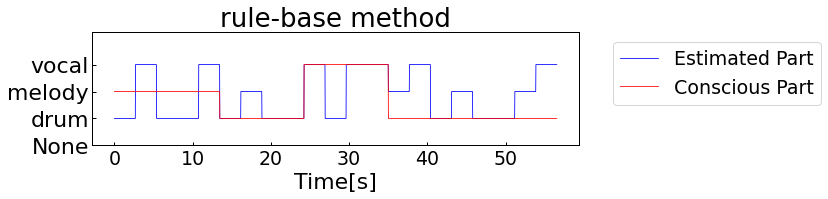

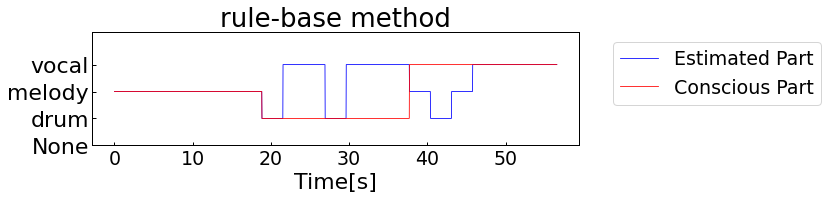

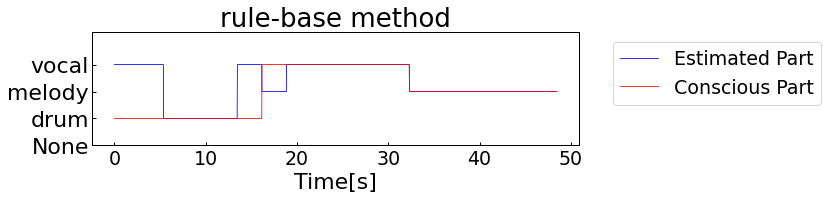

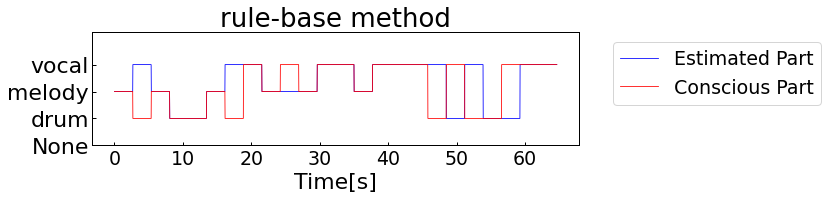

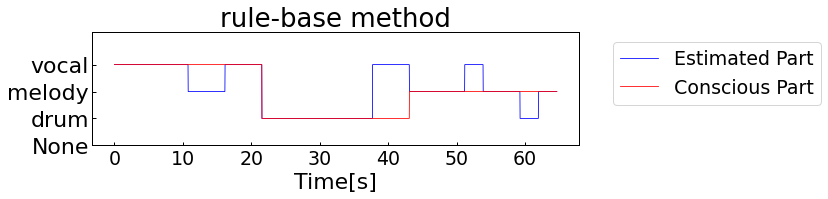

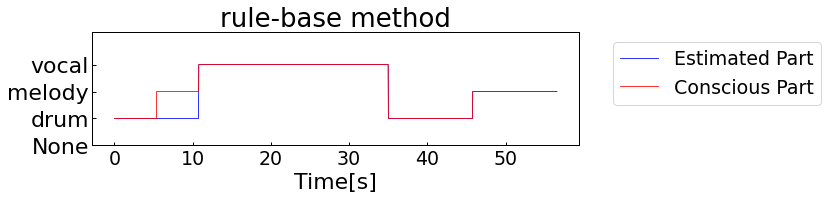

In [55]:
d_list, m_list, v_list = [], [], []
for i in range(6): 
    print(f'データ名:{list_name[i]}')
    tf_idf_data = one_dimension_part_to_value(v_m_d_list[i][0], v_m_d_list[i][1], v_m_d_list[i][2], rule_length_lists[i])
    print(tf_idf_data)
    accu = accuracy_lists[i]
    print(str(Score(tf_idf_data, accu)*100) + '%')
    enl_tfidf = enlarge_sentence(tf_idf_data, 100)
    enl_accuracy_data = enlarge_sentence(accu, 100)
    to_figure(
            enl_tfidf,
            enl_accuracy_data,
            enl_accuracy_data
        )
    d_score, m_score, v_score = part_score(tf_idf_data, accu)
    d_list.append(d_score)
    m_list.append(m_score)
    v_list.append(v_score)
    print('#######################################################')
print('vocal accuracy: ', v_list)
print('melody accuracy: ', m_list)
print('drum accuracy: ', d_list)

In [13]:
# toshi_ideal_df = pd.read_csv('uww2021_ideal_data.csv',skiprows=[0], header=None, usecols=[2, 3, 4], encoding="utf-8")
toshi_ideal_df = pd.read_csv('toshi_ideal_data.csv',skiprows=[0,1], header=None, usecols=[9, 10, 11], encoding="cp932")
toshi_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
# toshi_df.append([0,0,0])
toshi_ideal_vocals = toshi_ideal_df['ボーカル']
toshi_ideal_melodys = toshi_ideal_df['メロディ']
toshi_ideal_drums = toshi_ideal_df['ドラム']
print(toshi_ideal_vocals, toshi_ideal_melodys)

# for i in range(164, 180):
#     ideal_vocals[i] = 0
#     ideal_melodys[i] = 0
#     ideal_drums[i] = 0

# print(toshi_df)

0      0
1      0
2      0
3      0
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Name: ボーカル, Length: 180, dtype: int64 0      0
1      1
2      0
3      1
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Name: メロディ, Length: 180, dtype: int64


In [14]:
def create_idf(line, length):
    result = []
    idf_length_list = [[0, 56], [56, 112], [112, 168]]
#     idf_length_list = [[0, 32], [32, 56], [56, 88], [88, 112], [112, 144], [144, 168]]
#     idf_length_list = [[0, 36], [36, 68], [68, 100], [100, 132], [132, 164] ]
    for idf_length in idf_length_list:
        start, end = idf_length[0], idf_length[1]
        for _ in range(length):
            result.append(sum(line[start: end]))
#     result.insert(0, sum(line[0: 36]))
#     result.append(0)
#     result.append(0)
#     del result[23]
#     del result[15]
#     del result[7]
#     print(result[23], result[15], result[7])
    return result

print(create_idf(ideal_vocals, 7))
print(len(create_idf(ideal_melodys, 7)))
# print(ideal_vocals[164:180])

NameError: name 'ideal_vocals' is not defined

## UWW 

7 94
6 94
19 94
20 94
24 94
18 94
[2, 2, 1, 3, 3, 3]


C:\Users\tsuka\AppData\Local\Temp/ipykernel_5600/1093685647.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


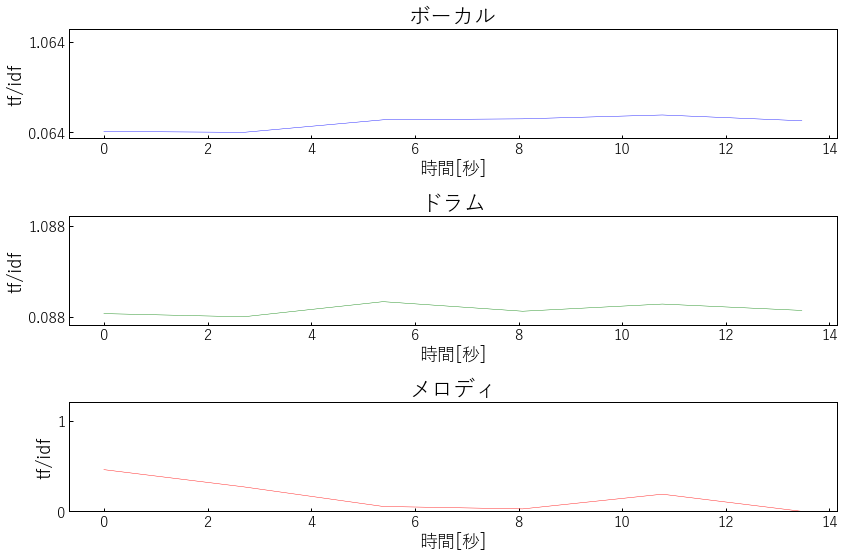

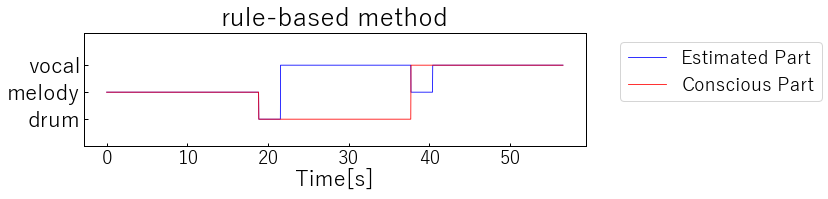

In [27]:
must_plot = True
uww_rule_base =  toshi_rulebase_func(uww_ideal_vocals, uww_ideal_melodys, uww_ideal_drums)
uww_tf_idf = one_dimension_part_to_value(uww_ideal_vocals, uww_ideal_melodys, uww_ideal_drums, must_plot)
int_uww_tf_idf = to_int(uww_tf_idf)
print(int_uww_tf_idf)
# print(len(toshi_tf_idf))
int_uww_rule_base = to_int(uww_rule_base)
enl_int_uww_rule_base = enlarge_sentence(int_uww_rule_base, 100)
enl_int_uww_tf_idf = enlarge_sentence(int_uww_tf_idf, 100)
enl_int_uww_accuracy_data = enlarge_sentence(uww2021_accuracy_data, 100)
# enl_int_toshi_rule_base = enlarge_sentence(int_toshi_rule_base, 100)
# enl_int_toshi_tf_idf = enlarge_sentence(int_toshi_tf_idf, 100)
# enl_int_toshi_accuracy_data = enlarge_sentence(int_toshi_accuracy_data, 100)
# enl_int_toshi_accuracy_data = enlarge_sentence(int_toshi_double_accuracy_data, 100)
# enl_int_toshi_accuracy_data = enlarge_sentence(int_toshi_half_accuracy_data, 100)

to_figure(enl_int_uww_rule_base,
    enl_int_uww_tf_idf,
    enl_int_uww_accuracy_data)

## toshi 

12 54
6 54
10 54
13 54
6 54
7 54
[1, 3, 1, 3, 1, 3]


ValueError: x and y must have same first dimension, but have shapes (2100,) and (2300,)

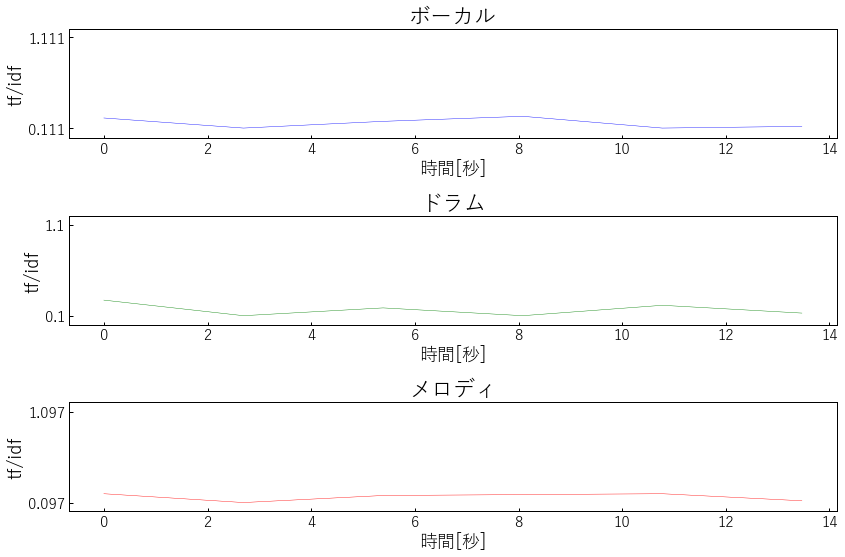

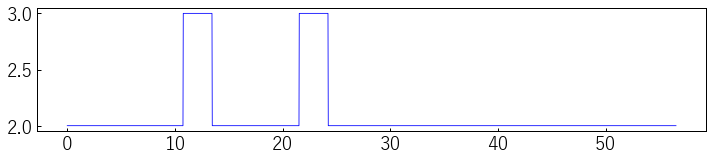

In [29]:
must_plot = True
toshi_rule_base =  toshi_rulebase_func(toshi_ideal_vocals, toshi_ideal_melodys, toshi_ideal_drums)
toshi_tf_idf = one_dimension_part_to_value(toshi_ideal_vocals, toshi_ideal_melodys, toshi_ideal_drums, must_plot)
int_toshi_tf_idf = to_int(toshi_tf_idf)
print(int_toshi_tf_idf)
# print(len(toshi_tf_idf))
int_toshi_rule_base = to_int(toshi_rule_base)
enl_int_toshi_rule_base = enlarge_sentence(int_toshi_rule_base, 100)
enl_int_toshi_tf_idf = enlarge_sentence(int_toshi_tf_idf, 100)
# enl_int_toshi_accuracy_data = enlarge_sentence(uww2021_accuracy_data, 100)
# enl_int_toshi_rule_base = enlarge_sentence(int_toshi_rule_base, 100)
# enl_int_toshi_tf_idf = enlarge_sentence(int_toshi_tf_idf, 100)
enl_int_toshi_accuracy_data = enlarge_sentence(int_toshi_accuracy_data, 100)
# enl_int_toshi_accuracy_data = enlarge_sentence(int_toshi_double_accuracy_data, 100)
# enl_int_toshi_accuracy_data = enlarge_sentence(int_toshi_half_accuracy_data, 100)

to_figure(enl_int_toshi_rule_base,
    enl_int_toshi_tf_idf,
    enl_int_toshi_accuracy_data)

# ルールベースの改良(時間かかる)

In [7]:
from typing import List
import itertools
import time

part_list = ['ボーカル', 'メロディ', 'ドラム', 'None']
num_list = [0, 1]
key_list = []
rule_num_list = [0, 1, 2, 3]
to_int_dic = {'ボーカル': 3, 'メロディ': 2, 'ドラム': 1, 'None': 0}
# accuracy_list = [2,2,2,2,2,2,2,1,1,1,1,1,1,1,3,3,3,3,3,3,3]
# accuracy_list = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]

start = time.perf_counter()

for i, j, k in itertools.product(num_list, num_list, num_list):
#     value_list[(i, j, k)] = ""
    key_list.append((i, j, k))
    
print(key_list)
# print(len(accuracy_list))

def create_rule(vocal, melody, drum, rule_length_list, accuracy_list):
    part_list = ['ボーカル', 'メロディ', 'ドラム', 'None']
    num_list = [0, 1]
    key_list = []
    rule_num_list = [0, 1, 2, 3]
    to_int_dic = {'ボーカル': 3, 'メロディ': 2, 'ドラム': 1, 'None': 0}
    result_length = 50000
    max_accuracy = [0 for _ in range(result_length)]
    max_list = [[] for _ in range(result_length)]
    max_result_list = [[] for _ in range(result_length)]
    max_part_list = [[] for _ in range(result_length)]
    for i, j, k in itertools.product(num_list, num_list, num_list):
#     value_list[(i, j, k)] = ""
        key_list.append((i, j, k))

    for a,b,c,d,e,f,g,h in itertools.product(part_list, part_list, part_list, part_list, part_list, part_list, part_list, part_list):
        for priority_rank in itertools.permutations(part_list, 4):
            part_result = []
            tmp_result = []
            score = 0
            rule_list = [a,b,c,d,e,f,g,h]
            value_list = {}
            for i in range(len(rule_list)):
                value_list[key_list[i]] = rule_list[i]
            for vo, me, dr in zip(vocal, melody, drum):
                part_result.append(value_list[(vo, me, dr)])
            
            for start, length, interval in rule_length_list:
                end = start + length
                for i in range(start, end, interval):
                    v_measure = part_result[i:i+interval].count('ボーカル')
                    
                    m_measure = part_result[i:i+interval].count('メロディ')
                    
                    d_measure = part_result[i:i+interval].count('ドラム')
                    
                    n_measure = part_result[i:i+interval].count('None')
                    
                    max_num = max(v_measure, m_measure, d_measure, n_measure)
                    
                    rule_base_list = []
                    
#                     if max_num == 0:
#                         rule_base_list.append('None')
                    
#                     else:   
                    if m_measure == max_num:
                        rule_base_list.append('メロディ')
                    if v_measure == max_num:
                        rule_base_list.append('ボーカル')
                    if d_measure == max_num:
                        rule_base_list.append('ドラム')
                    if n_measure == max_num:
                        rule_base_list.append('None')

                    # rule_base_listが空になることはない
                    if len(rule_base_list) >= 2:
                        if priority_rank[0] in rule_base_list:
                            rule_base_list = [priority_rank[0]]
                        elif priority_rank[1] in rule_base_list:
                            rule_base_list = [priority_rank[1]]
                        elif priority_rank[2] in rule_base_list:
                            rule_base_list = [priority_rank[2]]
                        elif priority_rank[3] in rule_base_list:
                            rule_base_list = [priority_rank[3]]

                    tmp_result.append(to_int_dic[rule_base_list[0]])
            for tmp, acc in zip(tmp_result, accuracy_list):
                if tmp == acc: score += 1

            tmp_accuracy = (score / len(tmp_result)) * 100
            for i in range(len(max_accuracy)):
                if tmp_accuracy > max_accuracy[i]:
                    max_accuracy[i] = tmp_accuracy
                    max_list[i] = [value_list, priority_rank]
                    max_result_list[i] = tmp_result
                    max_part_list[i] = part_result
                    break
                else: continue

    return max_list, max_accuracy, max_result_list, max_part_list


[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [18]:
def list_to_df(length, max_list, max_accuracy_list, max_result_list, max_part_list):
    rule_0_0_0 = []
    rule_0_0_1 = []
    rule_0_1_0 = []
    rule_0_1_1 = []
    rule_1_0_0 = []
    rule_1_0_1 = []
    rule_1_1_0 = []
    rule_1_1_1 = []
    rank_1 = []
    rank_2 = []
    rank_3 = []
    rank_4 = []
    for i in range(length):
        rule_0_0_0.append(max_list[i][0][(0,0,0)])
        rule_0_0_1.append(max_list[i][0][(0,0,1)])
        rule_0_1_0.append(max_list[i][0][(0,1,0)])
        rule_0_1_1.append(max_list[i][0][(0,1,1)])
        rule_1_0_0.append(max_list[i][0][(1,0,0)])
        rule_1_0_1.append(max_list[i][0][(1,0,1)])
        rule_1_1_0.append(max_list[i][0][(1,1,0)])
        rule_1_1_1.append(max_list[i][0][(1,1,1)])

        rank_1.append(max_list[i][1][0])
        rank_2.append(max_list[i][1][1])
        rank_3.append(max_list[i][1][2])
        rank_4.append(max_list[i][1][3])
        
    rulebase_df = pd.DataFrame(
        data={
            '(0,0,0)': rule_0_0_0,
            '(0,0,1)': rule_0_0_1,
            '(0,1,0)': rule_0_1_0,
            '(0,1,1)': rule_0_1_1,
            '(1,0,0)': rule_1_0_0,
            '(1,0,1)': rule_1_0_1,
            '(1,1,0)': rule_1_1_0,
            '(1,1,1)': rule_1_1_1,
            'rank_1': rank_1,
            'rank_2': rank_2,
            'rank_3': rank_3,
            'rank_4': rank_4,
            'accuracy': max_accuracy_list[:length],
            'int_result': max_result_list[:length],
            'part_result': max_part_list[:length]
        }
    )
    return rulebase_df



In [8]:
# toshi_ideal_df = pd.read_csv('uww2021_ideal_data.csv',skiprows=[0], header=None, usecols=[2, 3, 4], encoding="utf-8")
eval_uww_ideal_df = pd.read_csv('toshi_ideal_data.csv',skiprows=[0,1], header=None, usecols=[9, 10, 11], encoding="cp932")
eval_uww_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
# toshi_df.append([0,0,0])
eval_uww_vocals = eval_uww_ideal_df['ボーカル']
eval_uww_melodys = eval_uww_ideal_df['メロディ']
eval_uww_drums = eval_uww_ideal_df['ドラム']
print(eval_uww_vocals, eval_uww_melodys)
eval_uww_accuracy_data = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
print(len(int_toshi_accuracy_data))

0      0
1      0
2      0
3      0
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Name: ボーカル, Length: 180, dtype: int64 0      0
1      1
2      0
3      1
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Name: メロディ, Length: 180, dtype: int64


NameError: name 'int_toshi_accuracy_data' is not defined

In [7]:
toshi_ideal_df = pd.read_csv('uww2021_ideal_data.csv',skiprows=[0], header=None, usecols=[2, 3, 4], encoding="utf-8")

eval_toshi_vocals = uww_ideal_vocals
eval_toshi_melodys = uww_ideal_melodys
eval_toshi_drums = uww_ideal_drums
print(eval_toshi_vocals, eval_toshi_melodys)
# eval_accuracy_data = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
# print(len(int_toshi_accuracy_data))

NameError: name 'uww_ideal_vocals' is not defined

In [19]:
# eval_uww_accuracy_list = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
# eval_toshi_accuracy_list = [2,2,2,2,2,2,2,0,1,1,1,1,1,1,1,0,3,3,3,3,3,3,3,0]
# to_int_dic = {'ボーカル': 3, 'メロディ': 2, 'ドラム': 1, 'None': 0}
# toshi_max_accuracy_rule_list = toshi_max_list[:10544]
# uww_max_accuracy_rule_list = uww_max_list[:3224]
# toshi_max_accuracy_rule_list = toshi_max_list[:10544]

def evaluate_rule(vocal, melody, drum, rule_list, rule_length_list, eval_accuracy_list):
    result_length = 10544
    max_accuracy = [0 for _ in range(result_length)]
    max_list = [[] for _ in range(result_length)]
    max_result_list = [[] for _ in range(result_length)]
    max_part_list = [[] for _ in range(result_length)]
    # rule_length_list = [(0, 32, 8), (32, 4, 4), (36, 128, 8)]
#     rule_length_list = [(0, 168, 8)]
#     rule_length_list = [(0, 192, 8)]
    for rule in rule_list:
        part_result = []
        tmp_result = []
        score = 0
        combination_rule, priority_rank = rule[0], rule[1]
        for vo, me, dr in zip(vocal, melody, drum):
            part_result.append(combination_rule[(vo, me, dr)])
            
        for start, length, interval in rule_length_list:
            end = start + length
            for i in range(start, end, interval):
                v_measure = part_result[i:i+interval].count('ボーカル')

                m_measure = part_result[i:i+interval].count('メロディ')

                d_measure = part_result[i:i+interval].count('ドラム')

                n_measure = part_result[i:i+interval].count('None')

                max_num = max(v_measure, m_measure, d_measure, n_measure)

                rule_base_list = []

#                     if max_num == 0:
#                         rule_base_list.append('None')

#                     else:   
                if m_measure == max_num:
                    rule_base_list.append('メロディ')
                if v_measure == max_num:
                    rule_base_list.append('ボーカル')
                if d_measure == max_num:
                    rule_base_list.append('ドラム')
                if n_measure == max_num:
                    rule_base_list.append('None')

                # rule_base_listが空になることはない
                if len(rule_base_list) >= 2:
                    if priority_rank[0] in rule_base_list:
                        rule_base_list = [priority_rank[0]]
                    elif priority_rank[1] in rule_base_list:
                        rule_base_list = [priority_rank[1]]
                    elif priority_rank[2] in rule_base_list:
                        rule_base_list = [priority_rank[2]]
                    elif priority_rank[3] in rule_base_list:
                        rule_base_list = [priority_rank[3]]

                tmp_result.append(to_int_dic[rule_base_list[0]])
        for tmp, acc in zip(tmp_result, eval_accuracy_list):
            if tmp == acc: score += 1

        # ここまだかも
        tmp_accuracy = (score / len(tmp_result)) * 100
        for i in range(len(max_accuracy)):
            if tmp_accuracy > max_accuracy[i]:
                max_accuracy[i] = tmp_accuracy
                max_list[i] = [combination_rule, priority_rank]
                max_result_list[i] = tmp_result
                max_part_list[i] = part_result
                break
            else: continue

    return max_list, max_accuracy, max_result_list, max_part_list

            
eval_uww_max_list, eval_uww_max_accuracy, eval_uww_max_result_list, eval_uww_max_part_list = evaluate_rule(eval_uww_vocals, eval_uww_melodys, eval_uww_drums, uww_max_accuracy_rule_list, eval_uww_accuracy_list)
# eval_toshi_max_list, eval_toshi_max_accuracy, eval_toshi_max_result_list, eval_toshi_max_part_list = evaluate_rule(eval_toshi_vocals, eval_toshi_melodys, eval_toshi_drums, toshi_max_accuracy_rule_list, eval_toshi_accuracy_list)



NameError: name 'uww_max_list' is not defined

# DataFrameからリストへ変更

In [8]:
def df_to_list(df: pd.DataFrame):
    max_list = []
    max_accuracy_list = []
    max_result_list = []
    max_part_list = []
    for _, row in df.iterrows():
        rule_dic = {}
        rule_dic[(0,0,0)] = row['(0,0,0)'] 
        rule_dic[(0,0,1)] = row['(0,0,1)'] 
        rule_dic[(0,1,0)] = row['(0,1,0)'] 
        rule_dic[(0,1,1)] = row['(0,1,1)'] 
        rule_dic[(1,0,0)] = row['(1,0,0)'] 
        rule_dic[(1,0,1)] = row['(1,0,1)'] 
        rule_dic[(1,1,0)] = row['(1,1,0)'] 
        rule_dic[(1,1,1)] = row['(1,1,1)'] 
        priority_rank = (row['rank_1'], row['rank_2'], row['rank_3'], row['rank_4'])
        max_list.append([rule_dic, priority_rank])
        max_accuracy_list.append(row['accuracy'])
        max_result_list.append(row['int_result'])
        max_part_list.append(row['part_result'])
    return max_list, max_accuracy_list, max_result_list, max_part_list

In [ ]:
print(eval_max_accuracy)

In [78]:
for i in range(len(eval_uww_max_list)):
    if eval_uww_max_accuracy[i] < 39:
        print(i)
        break

12


# 交差検証

In [6]:
def create_group_rule(study_datas, study_rule_length_lists, study_accuracy_lists):
    run_count = 0
    rule_count = 0
    zero_count = 0
    update_count = 0
    part_list = ['ボーカル', 'メロディ', 'ドラム', 'None']
    num_list = [0, 1]
    key_list = []
    rule_num_list = [0, 1, 2, 3]
    to_int_dic = {'ボーカル': 3, 'メロディ': 2, 'ドラム': 1, 'None': 0}
    result_length = 50000
    max_accuracy = [0 for _ in range(result_length)]
    max_list = [[] for _ in range(result_length)]
    max_result_list = [[] for _ in range(result_length)]
    max_part_list = [[] for _ in range(result_length)]
    each_max_accuracy = [0 for _ in range(result_length)] 
    each_max_result_list = [0 for _ in range(result_length)] 
    each_max_part_list = [0 for _ in range(result_length)] 
    for i, j, k in itertools.product(num_list, num_list, num_list):
#     value_list[(i, j, k)] = ""
        key_list.append((i, j, k))

    for a,b,c,d,e,f,g,h in itertools.product(part_list, part_list, part_list, part_list, part_list, part_list, part_list, part_list):
        for priority_rank in itertools.permutations(part_list, 4):
            rule_count += 1
            rule_list = [a,b,c,d,e,f,g,h]
            value_list = {}
            average_score = 0
            tmp_each_max_accuracy = []
            tmp_each_result_list = []
            tmp_each_part_list = []
           
            for i in range(len(rule_list)):
                value_list[key_list[i]] = rule_list[i]
            
            for i in range(len(study_datas)):
                run_count += 1
                vocal, melody, drum = study_datas[i][0], study_datas[i][1], study_datas[i][2]
                rule_length_list = study_rule_length_lists[i]
                accuracy_list = study_accuracy_lists[i]
                tmp_score = 0
                tmp_result = []
                tmp_part_result = []

                for vo, me, dr in zip(vocal, melody, drum):
                    tmp_part_result.append(value_list[(vo, me, dr)])
                for start, length, interval in rule_length_list:
                    end = start + length
                    for i in range(start, end, interval):
                        v_measure = tmp_part_result[i:i+interval].count('ボーカル')
                        
                        m_measure = tmp_part_result[i:i+interval].count('メロディ')
                        
                        d_measure = tmp_part_result[i:i+interval].count('ドラム')
                        
                        n_measure = tmp_part_result[i:i+interval].count('None')
                        
                        max_num = max(v_measure, m_measure, d_measure, n_measure)
                        
                        rule_base_list = []
                        
    #                     if max_num == 0:
    #                         rule_base_list.append('None')
                        
    #                     else:   
                        if m_measure == max_num:
                            rule_base_list.append('メロディ')
                        if v_measure == max_num:
                            rule_base_list.append('ボーカル')
                        if d_measure == max_num:
                            rule_base_list.append('ドラム')
                        if n_measure == max_num:
                            rule_base_list.append('None')

                        # rule_base_listが空になることはない
                        if len(rule_base_list) >= 2:
                            if priority_rank[0] in rule_base_list:
                                rule_base_list = [priority_rank[0]]
                            elif priority_rank[1] in rule_base_list:
                                rule_base_list = [priority_rank[1]]
                            elif priority_rank[2] in rule_base_list:
                                rule_base_list = [priority_rank[2]]
                            elif priority_rank[3] in rule_base_list:
                                rule_base_list = [priority_rank[3]]

                        tmp_result.append(to_int_dic[rule_base_list[0]])
                for tmp, acc in zip(tmp_result, accuracy_list):
                    if tmp == acc: tmp_score += 1

                tmp_accuracy = (tmp_score / len(tmp_result)) * 100
                tmp_each_max_accuracy.append(tmp_accuracy)
                tmp_each_result_list.append(tmp_result)
                tmp_each_part_list.append(tmp_part_result)
                average_score += tmp_accuracy
            average_score /= len(study_datas)
            if average_score == 0: zero_count += 1
            for i in range(result_length):
                if average_score > max_accuracy[i]:
                    update_count += 1
                    max_accuracy[i] = average_score
                    max_list[i] = [value_list, priority_rank]
                    each_max_result_list[i] = tmp_each_result_list
                    each_max_part_list[i] = tmp_each_part_list
                    each_max_accuracy[i] = tmp_each_max_accuracy
                    break
                # else: continue
    print('run_count: ', run_count)
    print('zero_count: ', zero_count)
    print('run_rule_count: ', rule_count)
    print('update_count: ', update_count)
    return max_list, max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy

In [7]:
def group_list_to_df(length, max_list, max_accuracy_list, each_max_result_list, each_max_part_list, each_max_accuracy):
    for i in range(length):
        if max_accuracy_list[i] == 0:
            length = i
            break
    rule_0_0_0 = []
    rule_0_0_1 = []
    rule_0_1_0 = []
    rule_0_1_1 = []
    rule_1_0_0 = []
    rule_1_0_1 = []
    rule_1_1_0 = []
    rule_1_1_1 = []
    rank_1 = []
    rank_2 = []
    rank_3 = []
    rank_4 = []
    for i in range(length):
        rule_0_0_0.append(max_list[i][0][(0,0,0)])
        rule_0_0_1.append(max_list[i][0][(0,0,1)])
        rule_0_1_0.append(max_list[i][0][(0,1,0)])
        rule_0_1_1.append(max_list[i][0][(0,1,1)])
        rule_1_0_0.append(max_list[i][0][(1,0,0)])
        rule_1_0_1.append(max_list[i][0][(1,0,1)])
        rule_1_1_0.append(max_list[i][0][(1,1,0)])
        rule_1_1_1.append(max_list[i][0][(1,1,1)])

        rank_1.append(max_list[i][1][0])
        rank_2.append(max_list[i][1][1])
        rank_3.append(max_list[i][1][2])
        rank_4.append(max_list[i][1][3])
    
    rulebase_df = pd.DataFrame(
        data={
            '(0,0,0)': rule_0_0_0,
            '(0,0,1)': rule_0_0_1,
            '(0,1,0)': rule_0_1_0,
            '(0,1,1)': rule_0_1_1,
            '(1,0,0)': rule_1_0_0,
            '(1,0,1)': rule_1_0_1,
            '(1,1,0)': rule_1_1_0,
            '(1,1,1)': rule_1_1_1,
            'rank_1': rank_1,
            'rank_2': rank_2,
            'rank_3': rank_3,
            'rank_4': rank_4,
            'accuracy': max_accuracy_list[:length],
            'int_result': each_max_result_list[:length],
            'part_result': each_max_part_list[:length],
            'each_max_accuracy': each_max_accuracy[:length]
        }
    )
    return rulebase_df


In [12]:
import itertools
for v in itertools.combinations([0,5], 1):
    for num in v:
        print(num)
        exception_num = [i for i in [0,5] if not i in v][0]
        print(exception_num)

0
5
5
0


run_count:  7864320
zero_count:  4845
run_rule_count:  1572864
update_count:  1568019
[[38.095238095238095, 71.42857142857143, 61.111111111111114, 75.0, 79.16666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 75.0, 79.16666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 75.0, 79.16666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 75.0, 79.16666666666666], [28.57142857142857, 71.42857142857143, 66.66666666666666, 79.16666666666666, 75.0], [28.57142857142857, 71.42857142857143, 66.66666666666666, 79.16666666666666, 75.0], [28.57142857142857, 71.42857142857143, 66.66666666666666, 79.16666666666666, 75.0], [28.57142857142857, 71.42857142857143, 66.66666666666666, 79.16666666666666, 75.0], [33.33333333333333, 71.42857142857143, 61.111111111111114, 75.0, 79.16666666666666], [42.857142857142854, 66.66666666666666, 55.55555555555556, 79.16666666666666, 75.0]]
評価されるルール群:faded_pop_uww_normal_uww_breakTime_uww_mix_KEY_, 評価する

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  7864320
zero_count:  4188
run_rule_count:  1572864
update_count:  1568676
[[38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 70.83333333333334, 66.66666666666666], [38.095238095238095, 71.42857142857143, 61.111111111111114, 75.0, 57.14285714285714], [38.095238095238095, 71.42857142857

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  7864320
zero_count:  4194
run_rule_count:  1572864
update_count:  1568670
[[38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 66.66666666666666, 75.0, 57.14285714285714], [38.095238095238095, 71.42857142857143, 66.6

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  7864320
zero_count:  4695
run_rule_count:  1572864
update_count:  1568169
[[38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 71.42857142857143, 75.0, 79.16666666666666, 57.14285714285714], [42.857142857142854, 66.66666666666666, 79.1

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  7864320
zero_count:  4164
run_rule_count:  1572864
update_count:  1568700
[[38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [38.095238095238095, 61.111111111111114, 75.0, 79.16666666666666, 57.14285714285714], [33.33333333333333, 61.111111111111

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  7864320
zero_count:  29534
run_rule_count:  1572864
update_count:  1543330
[[71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 66.66666666666666, 75.0, 79.16666666666666, 57.14285714285714], [71.42857142857143, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666], [71.42857142857143, 61.111111111111114, 70.83333333333334, 79.16666666666666, 66.66666666666666]]
評価されるルール群:uww_normal_uww_breakTime_uww_mix_K

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_8184/1175415016.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


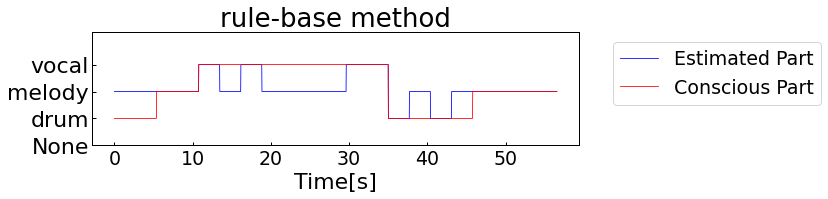

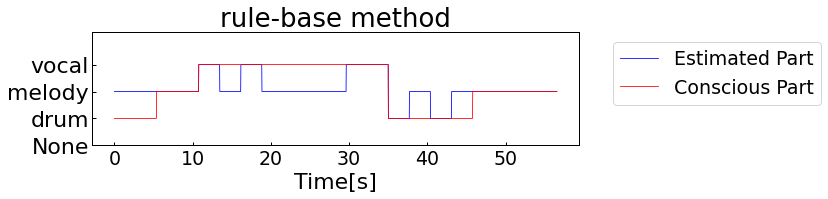

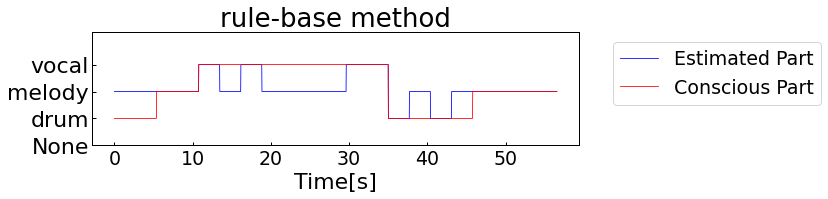

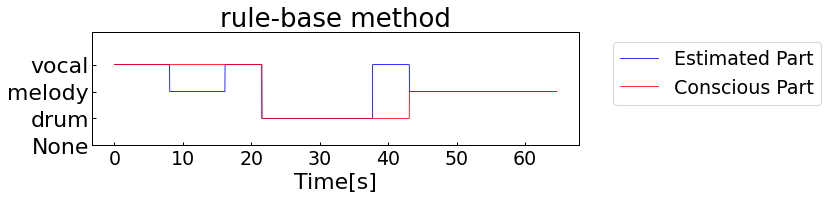

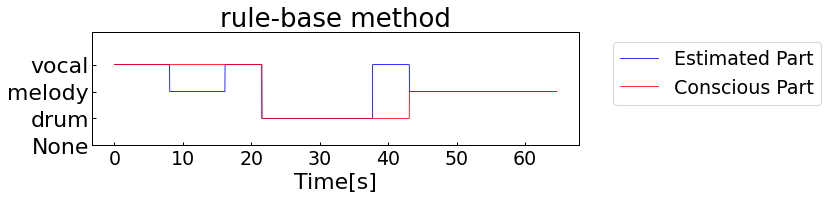

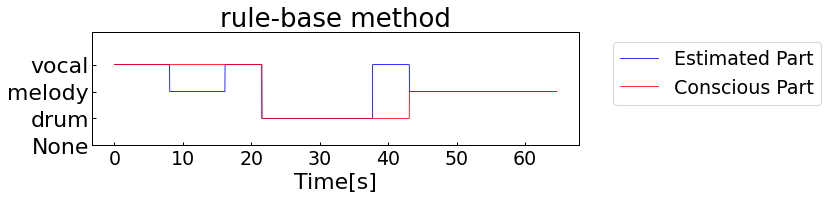

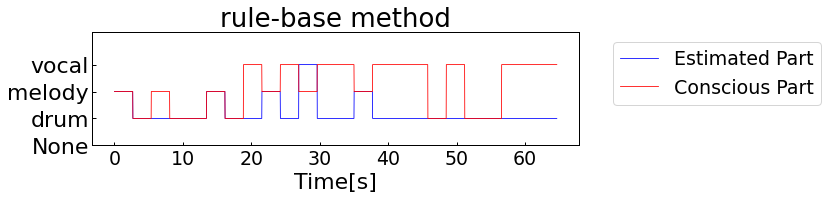

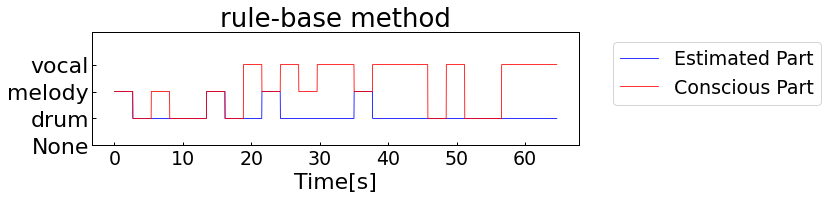

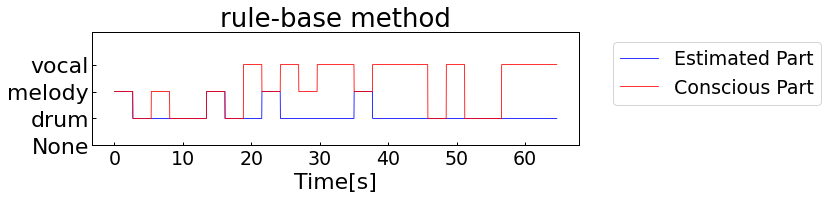

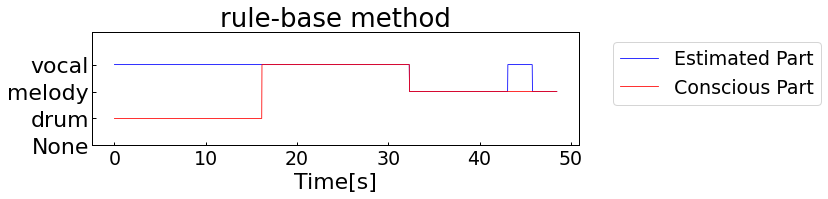

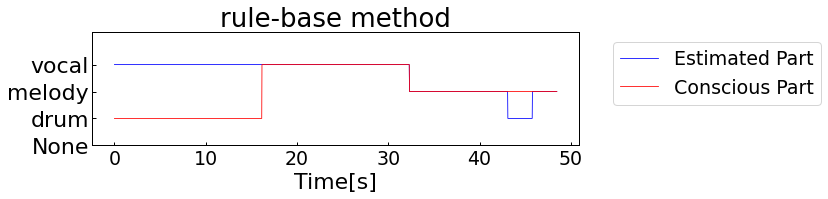

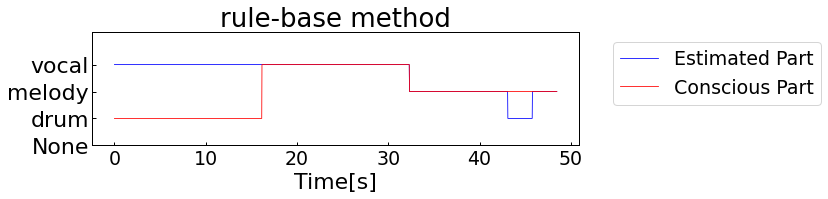

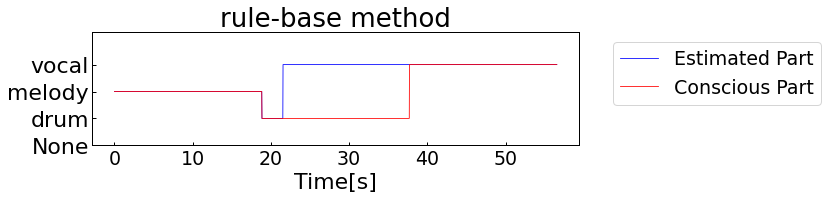

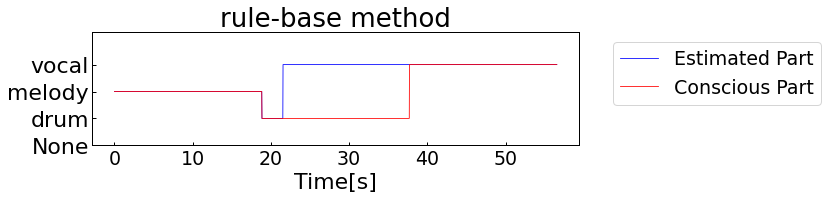

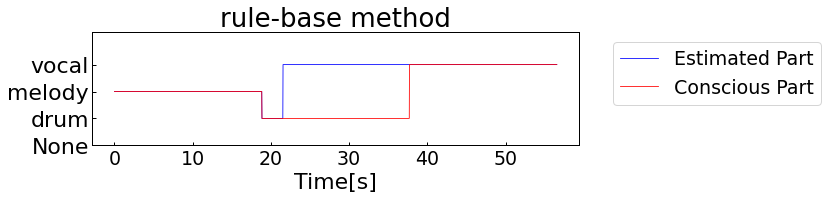

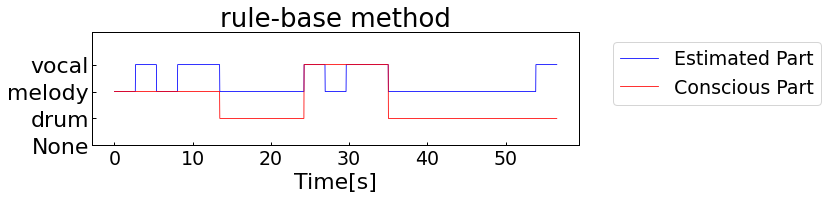

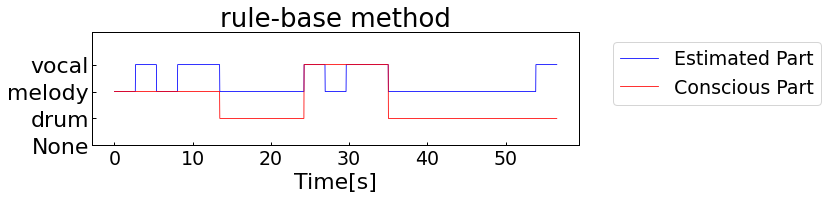

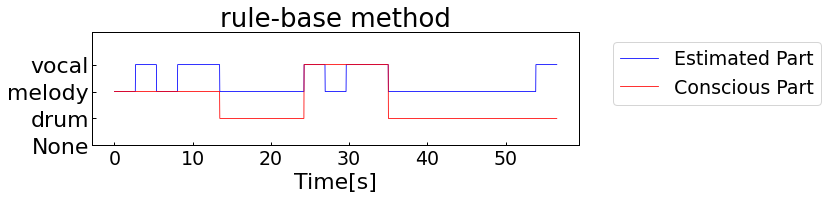

In [21]:
import itertools
for v in itertools.combinations(range(6), 5):
    study_datas = []
    study_rule_length_lists = []
    study_accuracy_lists = []
    data_name = ''
    for num in v:
        study_datas.append(v_m_d_list[num])
        study_rule_length_lists.append(rule_length_lists[num])
        study_accuracy_lists.append(accuracy_lists[num])
        data_name += list_name[num] + '_'
    group_max_list, group_max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy = create_group_rule(study_datas, study_rule_length_lists, study_accuracy_lists)
    max_df = group_list_to_df(len(group_max_list), group_max_list, group_max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy)
    max_df.to_csv(f'{data_name}df.csv', encoding='cp932')
    print(each_max_accuracy[:10])
    exception_num = [i for i in range(6) if not i in v][0]
    for i in range(len(group_max_accuracy)):
        if group_max_accuracy[i] < group_max_accuracy[0]:
            max_accuracy_len = i
            break
    e_num = exception_num
    print(f'評価されるルール群:{data_name}, 評価するデータ:{list_name[e_num]}')
    eval_max_list, eval_max_accuracy, eval_max_result_list, eval_max_part_list, be_evaluated_list = evaluate_rule(v_m_d_list[e_num][0], v_m_d_list[e_num][1], v_m_d_list[e_num][2], group_max_list[:max_accuracy_len], rule_length_lists[e_num], accuracy_lists[e_num], group_max_accuracy[:max_accuracy_len])
    pickUpData(eval_max_list, eval_max_accuracy, eval_max_result_list, accuracy_lists[e_num], be_evaluated_list)
    print('#######################################################')
    
    

run_count:  3145728
zero_count:  158919
run_rule_count:  1572864
update_count:  609587
[[71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221], [71.42857142857143, 72.22222222222221]]
評価されるルール群:uww_normal_uww_breakTime_, 評価するデータ:uww_mix


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.


64
eval_score: 54.166666666666664, base_score:71.82539682539682
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
ボーカル
メロディ
ドラム
None
[2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
number: 32
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ドラム
ボーカル
-----------------
ドラム
None
ボーカル
メロディ
[2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
number: 63
-----------------
メロディ
ドラム
メロディ
None
ボーカル
ドラム
メロディ
ボーカル
-----------------
None
ドラム
ボーカル
メロディ
[2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#######################################################


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  3145728
zero_count:  194769
run_rule_count:  1572864
update_count:  596206
[[71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666], [71.42857142857143, 79.16666666666666]]
評価されるルール群:uww_normal_uww_mix_, 評価するデータ:uww_breakTime
248
eval_score: 66.66666666666666, base_score:75.29761904761904
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
メロディ
ボーカル
ドラム
None
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2]
number: 124
-----------------
メロディ
ドラム
メロディ
メロディ
ドラム
ボーカル
None
ボーカル
-----------------
ボーカル
メロディ
ドラム
None
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2]
number: 247
-----------------
メロディ
ドラム
None
メロディ
ボーカル
ボーカル
None
ボーカル
-------

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


run_count:  3145728
zero_count:  186461
run_rule_count:  1572864
update_count:  620261
[[66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666], [66.66666666666666, 79.16666666666666]]
評価されるルール群:uww_breakTime_uww_mix_, 評価するデータ:uww_normal
248
eval_score: 71.42857142857143, base_score:72.91666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
メロディ
ボーカル
ドラム
None
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
number: 124
-----------------
メロディ
ドラム
メロディ
メロディ
ドラム
ボーカル
None
ボーカル
-----------------
ボーカル
メロディ
ドラム
None
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
number: 247
-----------------
メロディ
ドラム
None
メロディ
ボーカル
ボーカル

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_5447/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


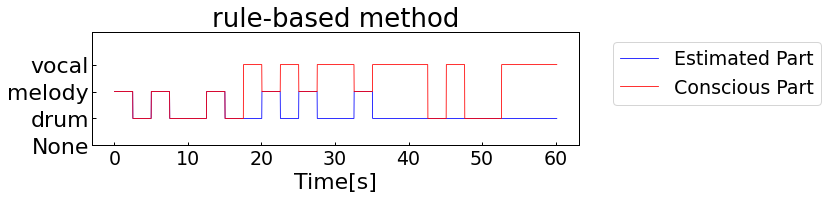

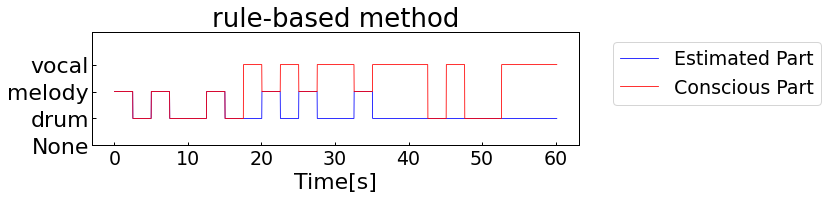

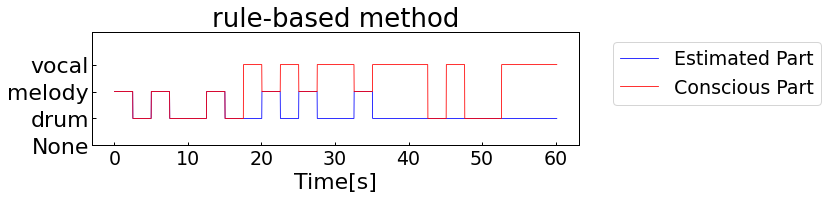

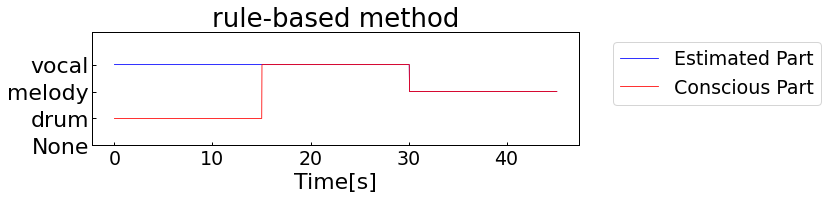

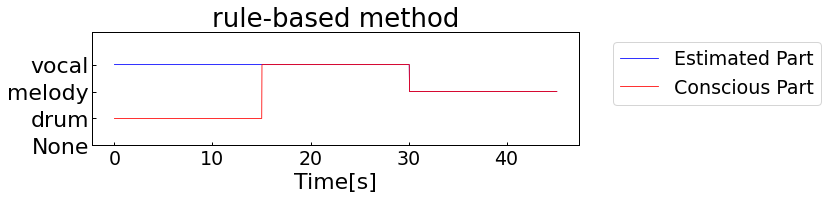

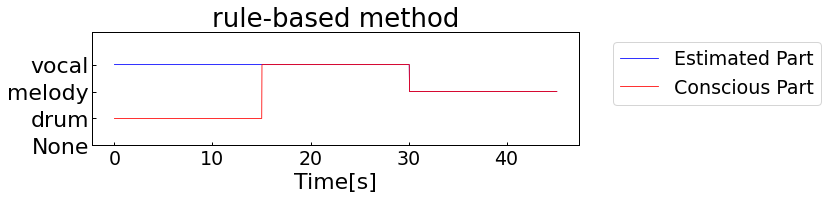

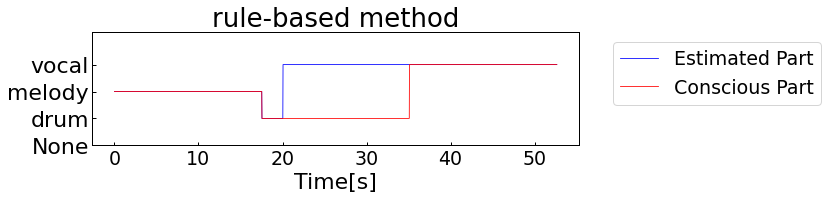

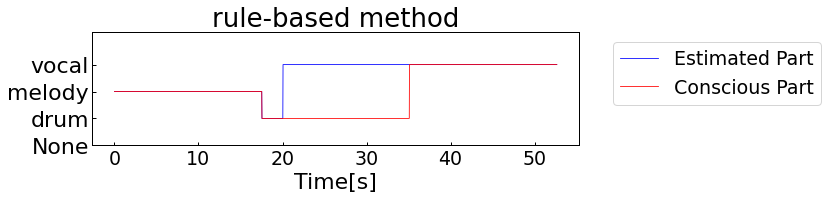

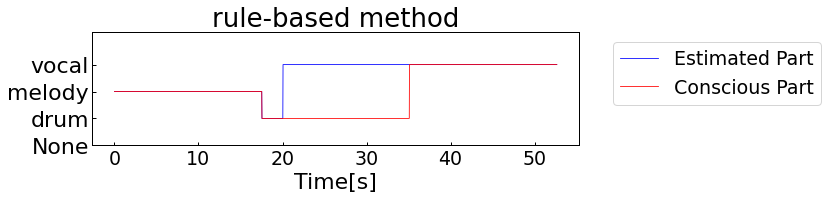

In [21]:
import itertools
for v in itertools.combinations(range(1,4), 2):
    study_datas = []
    study_rule_length_lists = []
    study_accuracy_lists = []
    data_name = ''
    for num in v:
        study_datas.append(v_m_d_list[num])
        study_rule_length_lists.append(rule_length_lists[num])
        study_accuracy_lists.append(accuracy_lists[num])
        data_name += list_name[num] + '_'
    group_max_list, group_max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy = create_group_rule(study_datas, study_rule_length_lists, study_accuracy_lists)
    max_df = group_list_to_df(len(group_max_list), group_max_list, group_max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy)
    max_df.to_csv(f'{data_name}df_2.csv', encoding='cp932')
    print(each_max_accuracy[:10])
    exception_num = [i for i in range(1,4) if not i in v][0]
    for i in range(len(group_max_accuracy)):
        if group_max_accuracy[i] < group_max_accuracy[0]:
            max_accuracy_len = i
            break
    e_num = exception_num
    print(f'評価されるルール群:{data_name}, 評価するデータ:{list_name[e_num]}')
    eval_max_list, eval_max_accuracy, eval_max_result_list, eval_max_part_list, be_evaluated_list = evaluate_rule(v_m_d_list[e_num][0], v_m_d_list[e_num][1], v_m_d_list[e_num][2], group_max_list[:max_accuracy_len], rule_length_lists[e_num], accuracy_lists[e_num], group_max_accuracy[:max_accuracy_len])
    pickUpData(eval_max_list, eval_max_accuracy, eval_max_result_list, accuracy_lists[e_num], be_evaluated_list)
    print('#######################################################')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
height1 = [80, 65, 100, 42, 54]  # 点数1
height2 = [55, 100, 98, 30, 21]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['Japanese', 'Math', 'Science', 'Social', 'English']
 
width = 0.3
 
plt.bar(left, height1, color='r', width=width, align='center')
plt.bar(left+width, height2, color='b', width=width, align='center')
 
plt.xticks(left + width/2, labels)
plt.show()

In [ ]:
for v in itertools.combinations(range(5), 4):
    study_datas = []
    study_rule_length_lists = []
    study_accuracy_lists = []
    data_name = ''
    for num in v:
        study_datas.append(v_m_d_list[num])
        study_rule_length_lists.append(rule_length_lists[num])
        study_accuracy_lists.append(accuracy_lists[num])
        data_name += list_name[num] + '_'
    # group_max_list, group_max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy = create_group_rule(study_datas, study_rule_length_lists, study_accuracy_lists)
    group_max_list, group_max_accuracy, each_max_result_list, each_max_part_list, each_max_accuracy = group_df_to_list(pd.read_csv(f'{data_name}df.csv', header=0, encoding='cp932'))
    for i in range(len(group_max_accuracy)):
        if group_max_accuracy[i] < group_max_accuracy[0]:
            max_accuracy_len = i
            break
    exception_num = [i for i in range(5) if not i in v][0]
    e_num = exception_num
    print(f'評価されるルール群:{data_name}, 評価するデータ:{list_name[e_num]}')
    print(each_max_accuracy[:10])
    eval_max_list, eval_max_accuracy, eval_max_result_list, eval_max_part_list, be_evaluated_list = evaluate_rule(v_m_d_list[e_num][0], v_m_d_list[e_num][1], v_m_d_list[e_num][2], group_max_list[:max_accuracy_len], rule_length_lists[e_num], accuracy_lists[e_num], group_max_accuracy[:max_accuracy_len])
    # pickUpData(eval_max_list, eval_max_accuracy, eval_max_result_list, accuracy_lists[e_num], be_evaluated_list)
    print('#######################################################')
    
    f'{data_name}df.csv'

評価されるルール群:toshi_uww_normal_uww_breakTime_uww_mix_, 評価するデータ:KEY
[33.33333333333333, 71.42857142857143, 66.66666666666666, 75.0]
#######################################################
評価されるルール群:toshi_uww_normal_uww_breakTime_KEY_, 評価するデータ:uww_mix
[38.095238095238095, 71.42857142857143, 66.66666666666666, 79.16666666666666]
#######################################################
評価されるルール群:toshi_uww_normal_uww_mix_KEY_, 評価するデータ:uww_breakTime
[38.095238095238095, 71.42857142857143, 75.0, 79.16666666666666]
#######################################################
評価されるルール群:toshi_uww_breakTime_uww_mix_KEY_, 評価するデータ:uww_normal
[38.095238095238095, 61.111111111111114, 75.0, 79.16666666666666]
#######################################################
評価されるルール群:uww_normal_uww_breakTime_uww_mix_KEY_, 評価するデータ:toshi
[71.42857142857143, 66.66666666666666, 79.16666666666666, 79.16666666666666]
#######################################################


In [23]:
def group_df_to_list(df: pd.DataFrame):
    max_list = []
    max_accuracy_list = []
    max_result_list = []
    max_part_list = []
    each_max_accuracy = []
    for _, row in df.iterrows():
        rule_dic = {}
        rule_dic[(0,0,0)] = row['(0,0,0)'] 
        rule_dic[(0,0,1)] = row['(0,0,1)'] 
        rule_dic[(0,1,0)] = row['(0,1,0)'] 
        rule_dic[(0,1,1)] = row['(0,1,1)'] 
        rule_dic[(1,0,0)] = row['(1,0,0)'] 
        rule_dic[(1,0,1)] = row['(1,0,1)'] 
        rule_dic[(1,1,0)] = row['(1,1,0)'] 
        rule_dic[(1,1,1)] = row['(1,1,1)'] 
        priority_rank = (row['rank_1'], row['rank_2'], row['rank_3'], row['rank_4'])
        max_list.append([rule_dic, priority_rank])
        max_accuracy_list.append(row['accuracy'])
        max_result_list.append(row['int_result'])
        max_part_list.append(row['part_result'])
        each_max_accuracy.append(row['each_max_accuracy'])
    return max_list, max_accuracy_list, max_result_list, max_part_list, each_max_accuracy

# 最適化ルールの発見 

In [16]:
def to_figure(rulebase_estimated_part,tfidf_estimated_part, concious_part):
    data_length = len(rulebase_estimated_part)
    figure_time_list = []
    for i in range(data_length):
        figure_time_list.append(i * 16 * quarter_count / 100)
#         figure_time_list.append(i * 16 * quarter_count / 100)
#     print(time_list)
#     df1 = df1.astype(float)
    x1 = figure_time_list
    y1 = rulebase_estimated_part
    y2 = tfidf_estimated_part
    y3 = concious_part


    # Figureの初期化
    fig = plt.figure(figsize=(12, 5)) #...1

    #図の形式定義
    plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['font.size'] = 19 #フォントの大きさ
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
#     label_l = ['','drum', 'melody', 'vocal']
    label_l = ['None', 'drum', 'melody', 'vocal']
    # label_l = ['', 'None', 'drum', 'melody', 'vocal']
#     label_l = ['', 'melody', 'drum', 'vocal']

    ax = fig.add_subplot(2, 1, 1)#(行，列，領域番号)
    ax.plot(x1, y1,c="blue",label='Estimated Part',linewidth=0.8)
    ax.plot(x1, y3,c="red",label='Conscious Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 4.2))
    ax.set_title("rule-based method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)
#     ax.show()

#     ax = fig.add_subplot(2, 1, 2)
#     ax.plot(x1, y2,c="green",label='Estimated Part',linewidth=0.8)
#     ax.plot(x1, y3,c="red",label='Conscious Part',linewidth=0.8)
#     ax.set_xlabel('Time[s]',fontsize=22)
# #     ax.set_ylabel('ang')
# #     ax.set_xlim((0,14000))
#     ax.set_title("tf/idf method",fontsize=26)
#     ax.set_ylim((0, 4.2))
#     ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
#     ax.set_yticklabels(label_l, ha='right',fontsize=22)
#     ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=19)

    figname = 'uww2021_dataA_3.pdf'
    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.savefig(figname)
#     files.download(figname)

In [9]:
import itertools
to_int_dic = {'ボーカル': 3, 'メロディ': 2, 'ドラム': 1, 'None': 0}
part_list = ['ボーカル', 'メロディ', 'ドラム', 'None']
num_list = [0, 1]
key_list = []
rule_num_list = [0, 1, 2, 3]
to_int_dic = {'ボーカル': 3, 'メロディ': 2, 'ドラム': 1, 'None': 0}
for i, j, k in itertools.product(num_list, num_list, num_list):
    key_list.append((i, j, k))

def evaluate_rule(vocal, melody, drum, rule_list, rule_length_list, eval_accuracy_list, base_accuracy_list):
    result_length = 50000
    max_accuracy = [0 for _ in range(result_length)]
    max_list = [[] for _ in range(result_length)]
    max_result_list = [[] for _ in range(result_length)]
    max_part_list = [[] for _ in range(result_length)]
    be_evaluated_accuracy = [0 for _ in range(result_length)]
    # rule_length_list = [(0, 32, 8), (32, 4, 4), (36, 128, 8)]
#     rule_length_list = [(0, 168, 8)]
#     rule_length_list = [(0, 192, 8)]
    rule_num = 0
    for rule in rule_list:
        if len(rule) >= 2:
            part_result = []
            tmp_result = []
            score = 0
            combination_rule, priority_rank = rule[0], rule[1]
            for vo, me, dr in zip(vocal, melody, drum):
                part_result.append(combination_rule[(vo, me, dr)])
                
            for start, length, interval in rule_length_list:
                end = start + length
                for i in range(start, end, interval):
                    v_measure = part_result[i:i+interval].count('ボーカル')
                    m_measure = part_result[i:i+interval].count('メロディ')
                    d_measure = part_result[i:i+interval].count('ドラム')
                    n_measure = part_result[i:i+interval].count('None')
                    max_num = max(v_measure, m_measure, d_measure, n_measure)

                    rule_base_list = []
    
    #                     if max_num == 0:
    #                         rule_base_list.append('None')

    #                     else:   
                    if m_measure == max_num:
                        rule_base_list.append('メロディ')
                    if v_measure == max_num:
                        rule_base_list.append('ボーカル')
                    if d_measure == max_num:
                        rule_base_list.append('ドラム')
                    if n_measure == max_num:
                        rule_base_list.append('None')

                    # rule_base_listが空になることはない
                    if len(rule_base_list) >= 2:
                        if priority_rank[0] in rule_base_list:
                            rule_base_list = [priority_rank[0]]
                        elif priority_rank[1] in rule_base_list:
                            rule_base_list = [priority_rank[1]]
                        elif priority_rank[2] in rule_base_list:
                            rule_base_list = [priority_rank[2]]
                        elif priority_rank[3] in rule_base_list:
                            rule_base_list = [priority_rank[3]]

                    tmp_result.append(to_int_dic[rule_base_list[0]])
            for tmp, acc in zip(tmp_result, eval_accuracy_list):
                if tmp == acc: score += 1

            # ここまだかも
            tmp_accuracy = (score / len(tmp_result)) * 100
            for i in range(len(max_accuracy)):
                if tmp_accuracy > max_accuracy[i]:
                    max_accuracy[i] = tmp_accuracy
                    max_list[i] = [combination_rule, priority_rank]
                    max_result_list[i] = tmp_result
                    max_part_list[i] = part_result
                    be_evaluated_accuracy[i] = base_accuracy_list[rule_num]
                    break
                else: continue
            rule_num += 1

    return max_list, max_accuracy, max_result_list, max_part_list, be_evaluated_accuracy

def pickUpData(max_list, max_accuracy_list, max_result_list, accuracy_data, base_max_accuracy):
    max_accuracy_num = 500000
    for i in range(50000):
        if max_accuracy_list[i] < max_accuracy_list[0]:
            max_accuracy_num = i
            break
    print(max_accuracy_num)
    base_rule_max = max(base_max_accuracy[:max_accuracy_num])
    both_max = []
    for i in range(max_accuracy_num):
        if base_max_accuracy[i] == base_rule_max:
            both_max.append(i)
    print(f'eval_score: {max_accuracy_list[0]}, base_score:{base_rule_max}')
    pickUpList = [0, len(both_max)//2, len(both_max)-1]
    for num in pickUpList:
        print('number:', both_max[num])
        print('-----------------')
        for i in range(8):
            print(max_list[both_max[num]][0][key_list[i]])
        print('-----------------')
        for i in range(4):
            print(max_list[both_max[num]][1][i])

        
        # print(len(max_result_list[num]))
        rulebase_estimate = max_result_list[num]
        # rulebase_estimate = eval(max_result_list[num])
        print(rulebase_estimate)
        enl_rulebase_estimate = enlarge_sentence(rulebase_estimate, 100)
        enl_accuracy_data = enlarge_sentence(accuracy_data, 100)

        to_figure(
            enl_rulebase_estimate,
            enl_accuracy_data,
            enl_accuracy_data
            )

In [18]:
toshi_ideal_df = pd.read_csv('toshi_ideal_data.csv',skiprows=[0,1], header=None, usecols=[9, 10, 11], encoding="cp932")
toshi_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
toshi_ideal_vocals = toshi_ideal_df['ボーカル']
toshi_ideal_melodys = toshi_ideal_df['メロディ']
toshi_ideal_drums = toshi_ideal_df['ドラム']

uww2021_ideal_df = pd.read_csv('uww2021_ideal_data.csv',skiprows=[0], header=None, usecols=[2, 3, 4], encoding="utf-8")
uww2021_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
uww2021_ideal_vocals = uww2021_ideal_df['ボーカル']
uww2021_ideal_melodys = uww2021_ideal_df['メロディ']
uww2021_ideal_drums = uww2021_ideal_df['ドラム']

uww2021_breakTime_nonBreak_ideal_df = pd.read_csv('uww2021_break_time_ideal_data_nonBreak.csv',skiprows=[0], header=None, sep=",", usecols=[2, 3, 4])
uww2021_breakTime_nonBreak_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
uww2021_breakTime_nonBreak_ideal_vocals = uww2021_breakTime_nonBreak_ideal_df['ボーカル']
uww2021_breakTime_nonBreak_ideal_melodys = uww2021_breakTime_nonBreak_ideal_df['メロディ']
uww2021_breakTime_nonBreak_ideal_drums = uww2021_breakTime_nonBreak_ideal_df['ドラム']

uww2021_mix_ideal_df = pd.read_csv('uww2021_mix_ideal_data.csv',skiprows=[0], header=None, sep="\t", usecols=[2, 3, 4], encoding="utf-8")

uww2021_mix_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
# toshi_df.append([0,0,0])
uww2021_mix_ideal_vocals = uww2021_mix_ideal_df['ボーカル']
uww2021_mix_ideal_melodys = uww2021_mix_ideal_df['メロディ']
uww2021_mix_ideal_drums = uww2021_mix_ideal_df['ドラム']

KEY_ideal_df = pd.read_csv('KEY_ideal_data.csv',skiprows=[0], sep='\t', header=None, usecols=[2, 3, 4], encoding="utf-8")
KEY_ideal_df.columns=["ボーカル", "メロディ", "ドラム"]
KEY_ideal_vocals = KEY_ideal_df['ボーカル']
KEY_ideal_melodys = KEY_ideal_df['メロディ']
KEY_ideal_drums = KEY_ideal_df['ドラム']

In [53]:
uww2021_rulebase_df = pd.read_csv('uww2021_normal_rulebase_df_large.csv', header=0, encoding='cp932')
uww2021_max_list, uww2021_max_accuracy, uww2021_result_list, uww2021_part_list = df_to_list(uww2021_rulebase_df)

uww2021_breakTime_nonBreak_rulebase_df = pd.read_csv('uww2021_breakTime_nonBreak_rulebase_df_large.csv', header=0, encoding='cp932')
uww2021_breakTime_nonBreak_max_list, uww2021_breakTime_nonBreak_max_accuracy, uww2021_breakTime_nonBreak_result_list, uww2021_breakTime_nonBreak_part_list = df_to_list(uww2021_breakTime_nonBreak_rulebase_df)

uww2021_mix_rulebase_df = pd.read_csv('uww2021_mix_rulebase_df_large.csv', header=0, encoding='cp932')
uww2021_mix_max_list, uww2021_mix_max_accuracy, uww2021_mix_result_list, uww2021_mix_part_list = df_to_list(uww2021_mix_rulebase_df)


# KEY_rulebase_df = pd.read_csv('KEY_rulebase_df_large.csv', header=0, encoding='cp932')
# KEY_max_list, KEY_max_accuracy, KEY_result_list, KEY_part_list = df_to_list(KEY_rulebase_df)

toshi_rulebase_df = pd.read_csv('toshi_rulebase_df_large.csv', header=0, encoding='cp932')
toshi_max_list, toshi_max_accuracy, toshi_result_list, toshi_part_list = df_to_list(toshi_rulebase_df)

toshi_accuracy_data = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
uww2021_accuracy_data = [2,2,2,2,2,2,2, 1,1,1,1,1,1,1, 3,3,3,3,3,3,3]
uww2021_breakTime_nonBreak_accuracy_data = [1,1,1,1,1,1,3,3,3,3,3,3,2,2,2,2,2,2]
uww2021_mix_accuracy_data = [2,1,2,1,1,2,1,3, 2,3,2,3,3,2,3,3, 3,1,3,1,1,3,3,3]
KEY_accuracy_data = [3,3,3,3,3,3,3,3, 1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2]

toshi_rule_length_list = [(0, 32, 8), (32, 4, 4), (36, 128, 8)]
uww2021_rule_length_list = [(0, 168, 8)]
uww2021_breakTime_nonBreak_rule_length_list = [(0, 144, 8)]
uww2021_mix_rule_length_list = [(0, 192, 8)]
KEY_rule_length_list = [(0, 192, 8)]
v_m_d_list = [
    [toshi_ideal_vocals, toshi_ideal_melodys, toshi_ideal_drums],
    [uww2021_ideal_vocals, uww2021_ideal_melodys, uww2021_ideal_drums],
    [uww2021_breakTime_nonBreak_ideal_vocals, uww2021_breakTime_nonBreak_ideal_melodys, uww2021_breakTime_nonBreak_ideal_drums],
    [uww2021_mix_ideal_vocals, uww2021_mix_ideal_melodys, uww2021_mix_ideal_drums],
    [KEY_ideal_vocals, KEY_ideal_melodys, KEY_ideal_drums]
    ]

list_name = ['toshi', 'uww_normal', 'uww_breakTime', 'uww_mix','KEY']
rule_lists = [toshi_max_list, uww2021_max_list, uww2021_breakTime_nonBreak_max_list, uww2021_mix_max_list, KEY_max_list]
rule_length_lists = [toshi_rule_length_list, uww2021_rule_length_list, uww2021_breakTime_nonBreak_rule_length_list, uww2021_mix_rule_length_list, KEY_rule_length_list]
accuracy_lists = [toshi_accuracy_data, uww2021_accuracy_data, uww2021_breakTime_nonBreak_accuracy_data, uww2021_mix_accuracy_data, KEY_accuracy_data]
max_accuracy_lists = [toshi_max_accuracy, uww2021_max_accuracy, uww2021_breakTime_nonBreak_max_accuracy, uww2021_mix_max_accuracy, KEY_max_accuracy]


In [46]:
KEY_rulebase_df = pd.read_csv('KEY_rulebase_df_large.csv', header=0, encoding='cp932')
KEY_max_list, KEY_max_accuracy, KEY_result_list, KEY_part_list = df_to_list(KEY_rulebase_df)

TypeError: read_csv() got an unexpected keyword argument 'errors'

In [54]:
b_num, e_num = 4, 0
eval_max_list, eval_max_accuracy, eval_max_result_list, eval_max_part_list, be_evaluated_list = evaluate_rule(v_m_d_list[e_num][0], v_m_d_list[e_num][1], v_m_d_list[e_num][2], rule_lists[b_num], rule_length_lists[e_num], accuracy_lists[e_num], max_accuracy_lists[b_num])



In [ ]:
print(KEY_max_list[0])
print(toshi_max_list[0])
print(eval_max_accuracy[0])
print(f'評価されるルール群:{list_name[b_num]}, 評価するデータ:{list_name[e_num]}')
pickUpData(eval_max_list, eval_max_accuracy, eval_max_result_list, accuracy_lists[e_num], be_evaluated_list)

評価されるルール群:toshi, 評価するデータ:uww_normal
4
eval_score: 47.61904761904761, base_score:57.14285714285714
number: 0
-----------------
ドラム
ドラム
メロディ
ドラム
ドラム
ボーカル
ボーカル
ボーカル
-----------------
メロディ
ドラム
ボーカル
None
[2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]
number: 2
-----------------
ドラム
ドラム
メロディ
ドラム
ドラム
ボーカル
ボーカル
ボーカル
-----------------
メロディ
None
ドラム
ボーカル
[2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]
number: 3
-----------------
ドラム
ドラム
メロディ
ドラム
ドラム
ボーカル
ボーカル
ボーカル
-----------------
None
メロディ
ドラム
ボーカル
[2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3]
#######################################################
評価されるルール群:toshi, 評価するデータ:uww_breakTime


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


8
eval_score: 44.44444444444444, base_score:57.14285714285714
number: 0
-----------------
ドラム
ドラム
ドラム
メロディ
ボーカル
ドラム
メロディ
ボーカル
-----------------
ボーカル
ドラム
メロディ
None
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
number: 4
-----------------
ドラム
None
ドラム
メロディ
ボーカル
ドラム
メロディ
ボーカル
-----------------
ボーカル
ドラム
メロディ
None
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
number: 7
-----------------
ドラム
None
ドラム
メロディ
ボーカル
ドラム
メロディ
ボーカル
-----------------
None
ボーカル
ドラム
メロディ
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
#######################################################
評価されるルール群:toshi, 評価するデータ:uww_mix


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


4
eval_score: 79.16666666666666, base_score:57.14285714285714
number: 0
-----------------
ドラム
ドラム
メロディ
メロディ
ドラム
ボーカル
ボーカル
メロディ
-----------------
ボーカル
ドラム
メロディ
None
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 2
-----------------
ドラム
ドラム
メロディ
メロディ
ドラム
ボーカル
ボーカル
メロディ
-----------------
ボーカル
None
ドラム
メロディ
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 3
-----------------
ドラム
ドラム
メロディ
メロディ
ドラム
ボーカル
ボーカル
メロディ
-----------------
None
ボーカル
ドラム
メロディ
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
#######################################################
評価されるルール群:toshi, 評価するデータ:KEY


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


61
eval_score: 54.166666666666664, base_score:66.66666666666666
number: 0
-----------------
ドラム
ドラム
メロディ
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
ボーカル
ドラム
メロディ
None
[3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1]
number: 4
-----------------
ドラム
ドラム
メロディ
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
ドラム
ボーカル
None
メロディ
[3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1]
number: 7
-----------------
ドラム
ドラム
メロディ
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
None
ドラム
ボーカル
メロディ
[3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1]
#######################################################
評価されるルール群:uww_normal, 評価するデータ:toshi


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


68
eval_score: 57.14285714285714, base_score:66.66666666666666
number: 0
-----------------
メロディ
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
-----------------
ドラム
ボーカル
メロディ
None
[2, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1]
number: 6
-----------------
メロディ
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
-----------------
None
ドラム
ボーカル
メロディ
[2, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1]
number: 11
-----------------
メロディ
ドラム
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
-----------------
None
ドラム
ボーカル
メロディ
[2, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1]
#######################################################
評価されるルール群:uww_normal, 評価するデータ:uww_breakTime


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


392
eval_score: 72.22222222222221, base_score:71.42857142857143
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
ボーカル
メロディ
ドラム
None
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
number: 32
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ドラム
ボーカル
-----------------
ドラム
None
ボーカル
メロディ
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


number: 63
-----------------
メロディ
ドラム
メロディ
None
ボーカル
ドラム
メロディ
ボーカル
-----------------
None
ドラム
ボーカル
メロディ
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
#######################################################
評価されるルール群:uww_normal, 評価するデータ:uww_mix
5215
eval_score: 79.16666666666666, base_score:71.42857142857143
number: 0
-----------------
メロディ
ドラム
ボーカル
メロディ
ボーカル
ボーカル
ボーカル
ドラム
-----------------
メロディ
ドラム
ボーカル
None
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 443
-----------------
メロディ
ドラム
メロディ
メロディ
None
ボーカル
ボーカル
ドラム
-----------------
ドラム
None
ボーカル
メロディ
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 886
-----------------
メロディ
ドラム
None
メロディ
None
ボーカル
None
ドラム
-----------------
ドラム
メロディ
None
ボーカル
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
#######################################################
評価されるルール群:uww_normal, 評価するデータ:KEY


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 5)) #...1
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l

753
eval_score: 79.16666666666666, base_score:71.42857142857143
number: 0
-----------------
メロディ
ドラム
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
メロディ
ボーカル
ドラム
None
[3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
number: 104
-----------------
メロディ
ドラム
メロディ
ドラム
ボーカル
ボーカル
None
ボーカル
-----------------
ボーカル
None
ドラム
メロディ
[3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
number: 207
-----------------
メロディ
ドラム
メロディ
None
ボーカル
ドラム
None
ボーカル
-----------------
ドラム
ボーカル
メロディ
None
[3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
#######################################################
評価されるルール群:uww_breakTime, 評価するデータ:toshi


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


48
eval_score: 57.14285714285714, base_score:61.11111111111112
number: 0
-----------------
メロディ
メロディ
ドラム
ドラム
ボーカル
ドラム
ボーカル
メロディ
-----------------
ボーカル
ドラム
メロディ
None
[2, 2, 1, 2, 3, 1, 2, 1, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 2]
number: 24
-----------------
メロディ
ドラム
ドラム
ドラム
ボーカル
ドラム
ボーカル
メロディ
-----------------
ボーカル
ドラム
メロディ
None
[2, 2, 1, 2, 3, 1, 2, 1, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 2]
number: 47
-----------------
メロディ
ドラム
ドラム
ドラム
メロディ
ドラム
ボーカル
メロディ
-----------------
None
ドラム
メロディ
ボーカル
[2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 2]


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


#######################################################
評価されるルール群:uww_breakTime, 評価するデータ:uww_normal
2364
eval_score: 71.42857142857143, base_score:72.22222222222221
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
ボーカル
メロディ
ドラム
None
[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1]
number: 32
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ドラム
ボーカル
-----------------
ドラム
None
ボーカル
メロディ
[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1]
number: 63
-----------------
メロディ
ドラム
メロディ
None
ボーカル
ドラム
メロディ
ボーカル
-----------------
None
ドラム
ボーカル
メロディ
[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1]
#######################################################
評価されるルール群:uww_breakTime, 評価するデータ:uww_mix


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


3848
eval_score: 79.16666666666666, base_score:66.66666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
メロディ
ボーカル
ドラム
None
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 202
-----------------
メロディ
ドラム
メロディ
メロディ
ドラム
ボーカル
ドラム
ボーカル
-----------------
None
ボーカル
ドラム
メロディ
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 403
-----------------
メロディ
ドラム
None
メロディ
ボーカル
ボーカル
None
ドラム
-----------------
None
ボーカル
メロディ
ドラム
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
#######################################################
評価されるルール群:uww_breakTime, 評価するデータ:KEY


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


760
eval_score: 79.16666666666666, base_score:72.22222222222221
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
ボーカル
ドラム
メロディ
None
[3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
number: 11
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
None
ドラム
メロディ
ボーカル
[3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


number: 21
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
None
ボーカル
-----------------
ドラム
メロディ
ボーカル
None
[3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
#######################################################
評価されるルール群:uww_mix, 評価するデータ:toshi
4
eval_score: 76.19047619047619, base_score:54.16666666666666
number: 0
-----------------
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
ボーカル
ドラム
メロディ
None
[1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1]
number: 2
-----------------
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
ボーカル
None
ドラム
メロディ
[1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1]
number: 3
-----------------
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
None
ボーカル
ドラム
メロディ
[1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1]
#######################################################
評価されるルール群:uww_mix, 評価するデータ:uww_normal


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


1928
eval_score: 71.42857142857143, base_score:79.16666666666666
number: 0
-----------------
メロディ
ドラム
ボーカル
メロディ
ボーカル
ボーカル
ボーカル
ドラム
-----------------
メロディ
ドラム
ボーカル
None
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
number: 443
-----------------
メロディ
ドラム
メロディ
メロディ
None
ボーカル
ボーカル
ドラム
-----------------
ドラム
None
ボーカル
メロディ
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3]
number: 886
-----------------
メロディ
ドラム
None
メロディ
None
ボーカル
None
ドラム
-----------------
ドラム
メロディ
None
ボーカル
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3]
#######################################################
評価されるルール群:uww_mix, 評価するデータ:uww_breakTime


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


212
eval_score: 72.22222222222221, base_score:54.16666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
ボーカル
メロディ
ドラム
None
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


number: 106
-----------------
メロディ
ドラム
メロディ
ドラム
ボーカル
ドラム
メロディ
ボーカル
-----------------
None
メロディ
ボーカル
ドラム
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
number: 211
-----------------
メロディ
ドラム
None
メロディ
ボーカル
ドラム
None
ボーカル
-----------------
None
ドラム
メロディ
ボーカル
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
#######################################################
評価されるルール群:uww_mix, 評価するデータ:KEY
268
eval_score: 79.16666666666666, base_score:79.16666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
ドラム
メロディ
ボーカル
None
[3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
number: 24
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ドラム
ドラム
-----------------
ボーカル
ドラム
メロディ
None
[3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
number: 47
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
None
None
-----------------
ドラム
ボーカル
None
メロディ
[3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


4
eval_score: 76.19047619047619, base_score:50.0
number: 0
-----------------
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
ボーカル
ドラム
メロディ
None
[1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1]
number: 2
-----------------
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
ボーカル
None
ドラム
メロディ
[1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1]
number: 3
-----------------
ドラム
ドラム
ドラム
ドラム
ボーカル
ボーカル
ボーカル
メロディ
-----------------
None
ボーカル
ドラム
メロディ
[1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1]
#######################################################
評価されるルール群:KEY, 評価するデータ:uww_normal


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


1306
eval_score: 71.42857142857143, base_score:79.16666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
メロディ
ボーカル
ドラム
None
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
number: 104
-----------------
メロディ
ドラム
メロディ
ドラム
ボーカル
ボーカル
None
ボーカル
-----------------
ボーカル
None
ドラム
メロディ
[2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
number: 207
-----------------
メロディ
ドラム
メロディ
None
ボーカル
ドラム
None
ボーカル
-----------------
ドラム
ボーカル
メロディ
None
[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1]
#######################################################
評価されるルール群:KEY, 評価するデータ:uww_breakTime


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


353
eval_score: 72.22222222222221, base_score:79.16666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
ボーカル
ドラム
メロディ
None
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
number: 11
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
ボーカル
ボーカル
-----------------
None
ドラム
メロディ
ボーカル
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
number: 21
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ドラム
None
ボーカル
-----------------
ドラム
メロディ
ボーカル
None
[1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
#######################################################
評価されるルール群:KEY, 評価するデータ:uww_mix


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


1939
eval_score: 79.16666666666666, base_score:79.16666666666666
number: 0
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ボーカル
ボーカル
-----------------
ドラム
メロディ
ボーカル
None
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 24
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
ドラム
ドラム
-----------------
ボーカル
ドラム
メロディ
None
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
number: 47
-----------------
メロディ
ドラム
メロディ
メロディ
ボーカル
ボーカル
None
None
-----------------
ドラム
ボーカル
None
メロディ
[2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3]
#######################################################


/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_2906/1902248816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=22)


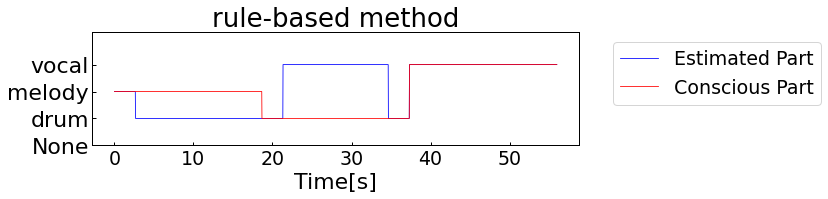

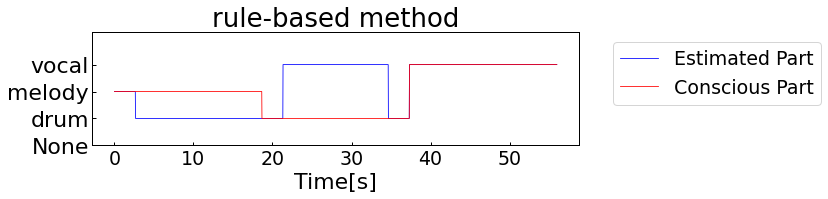

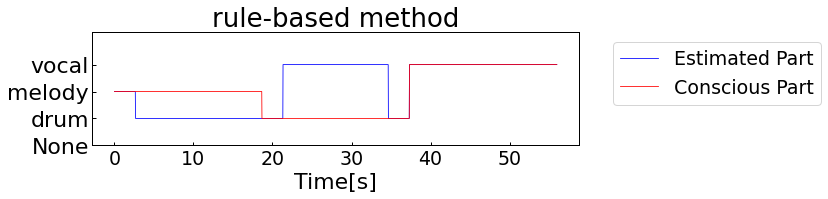

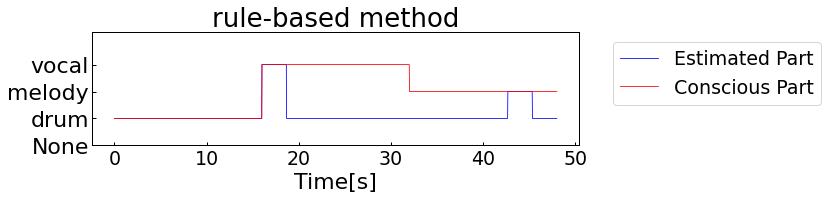

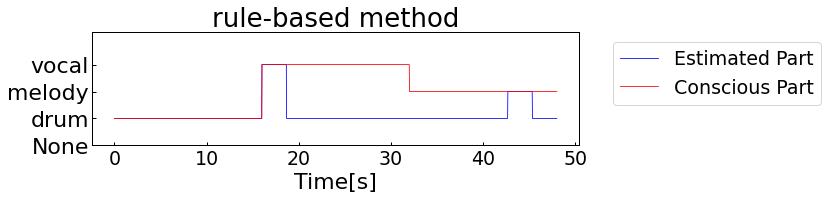

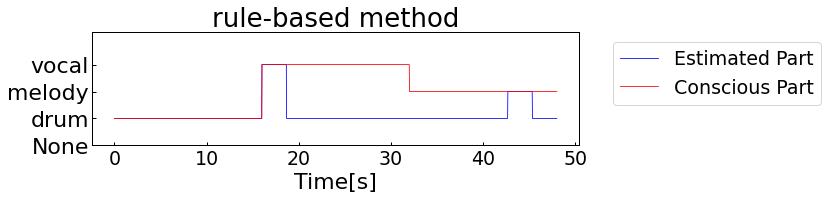

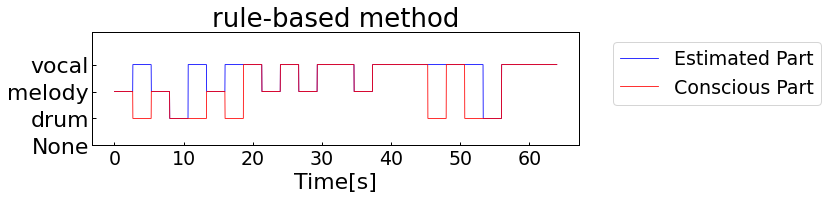

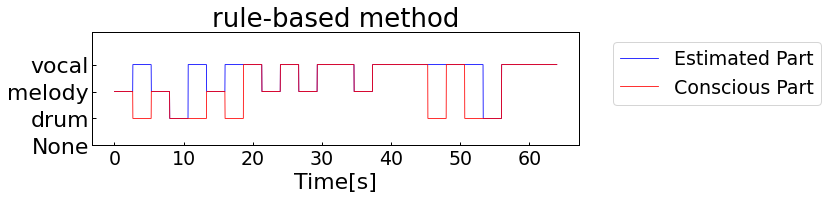

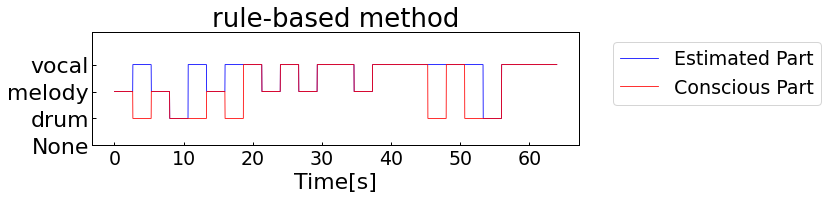

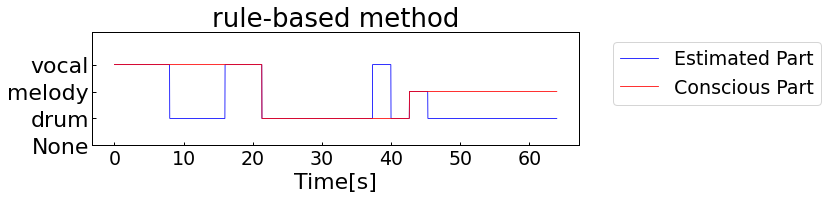

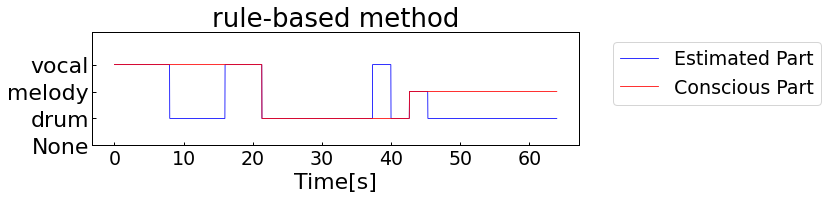

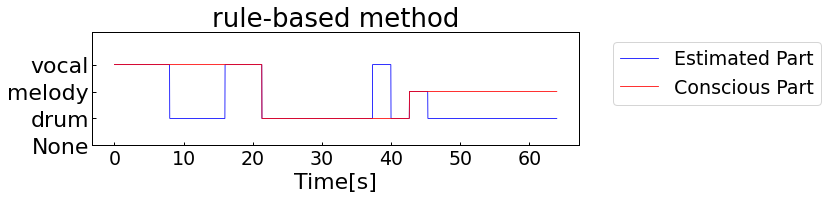

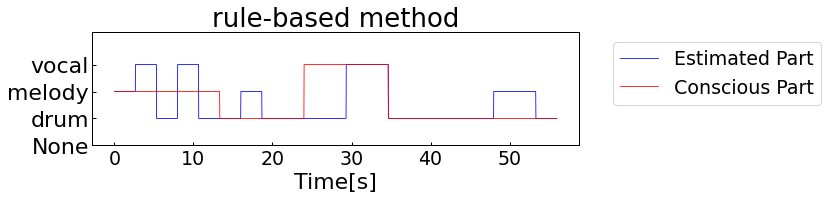

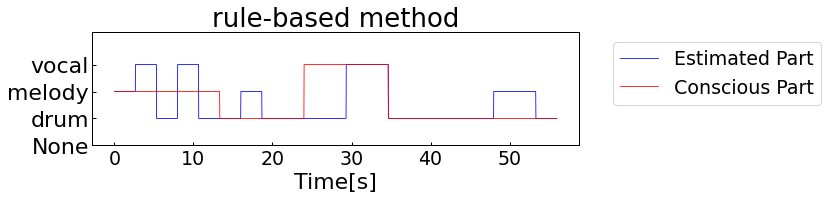

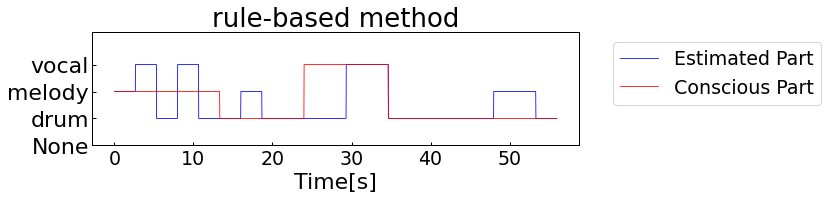

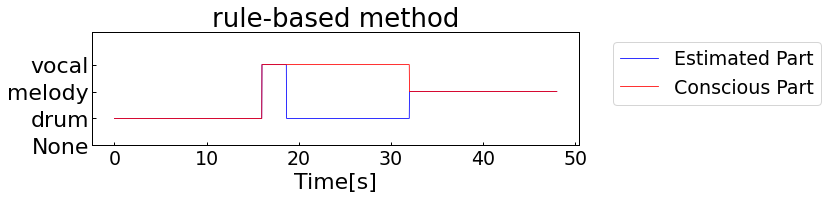

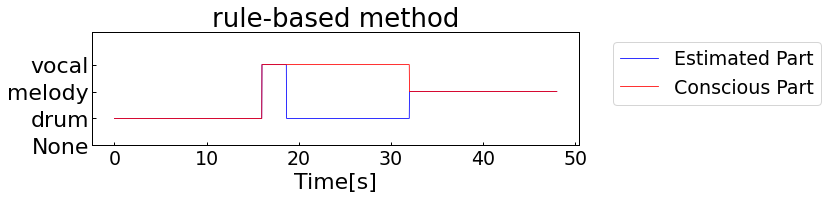

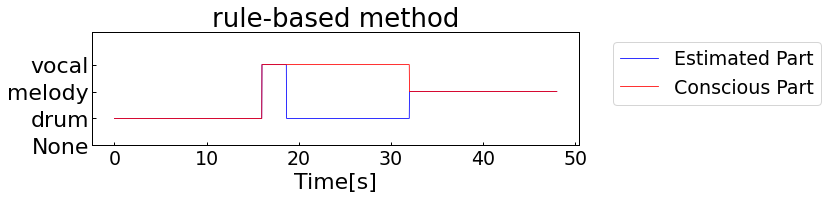

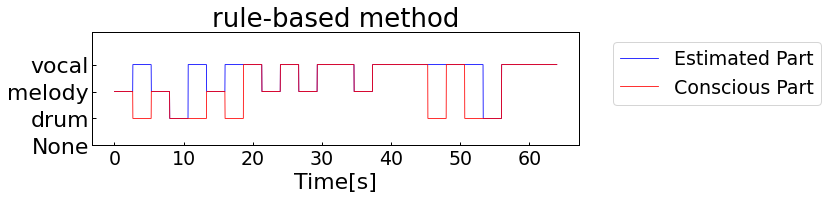

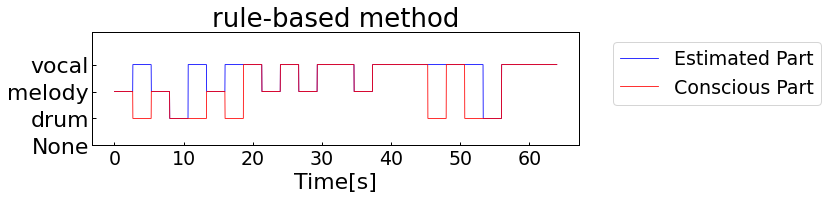

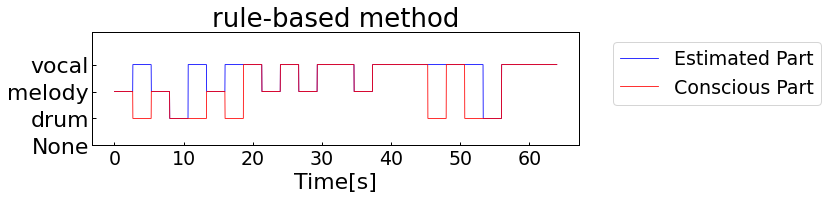

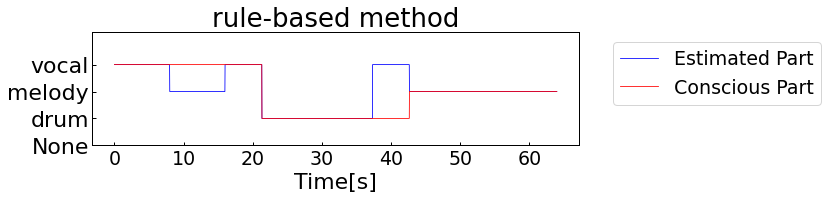

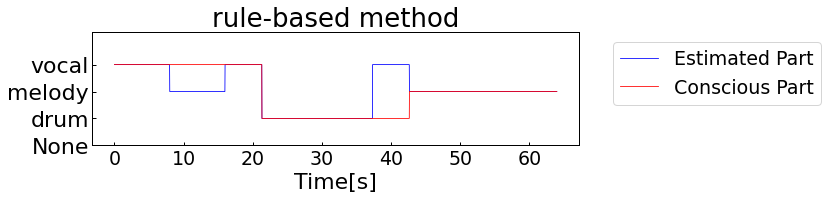

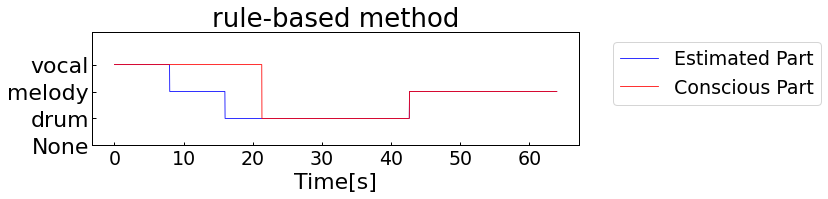

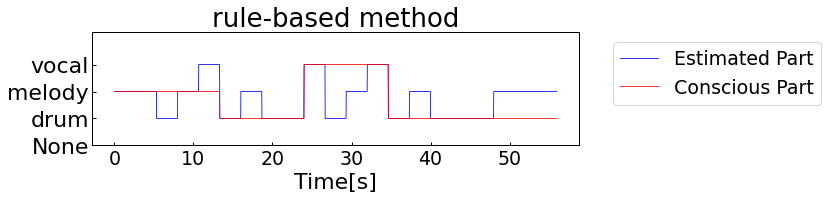

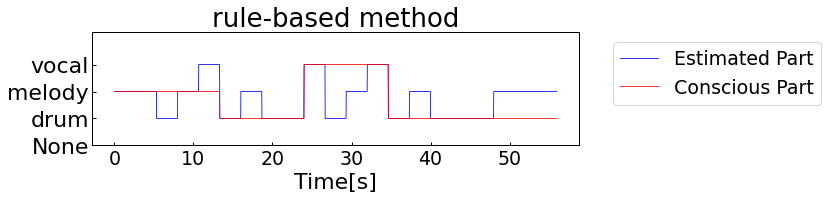

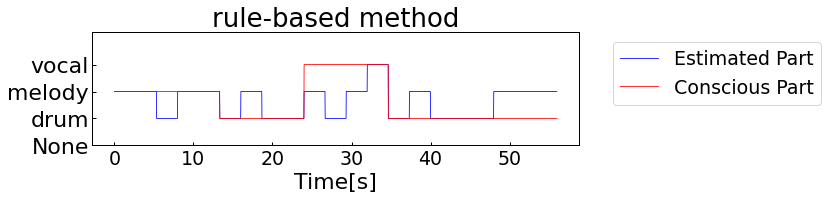

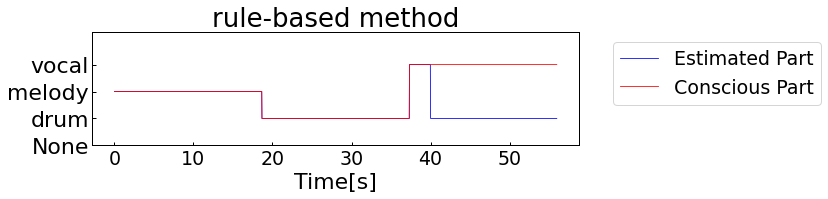

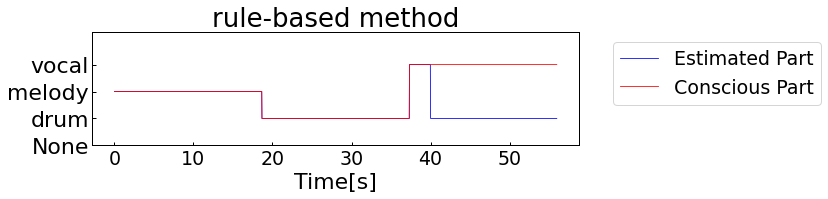

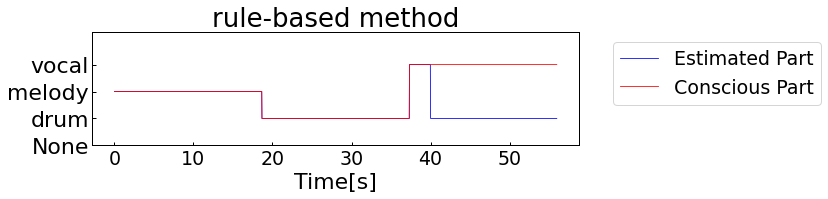

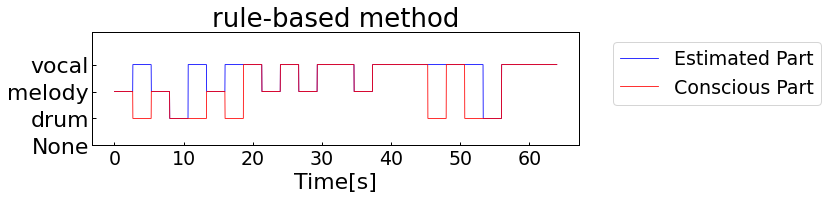

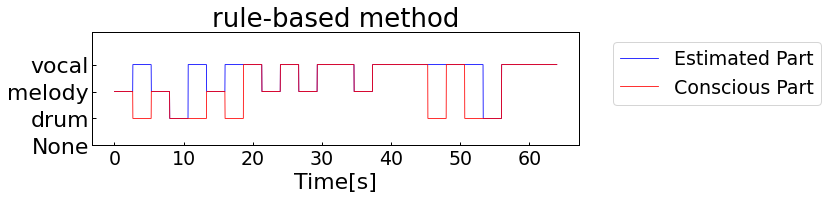

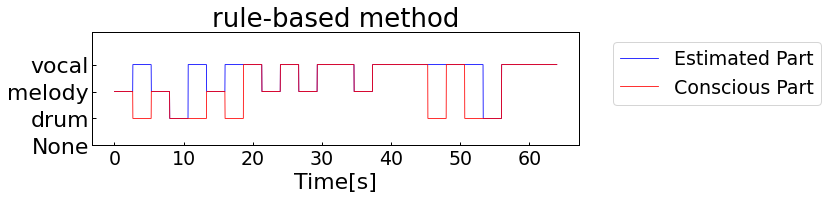

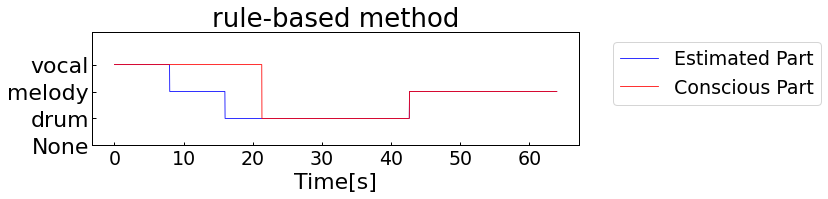

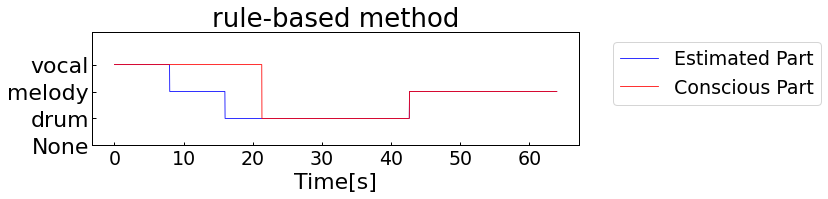

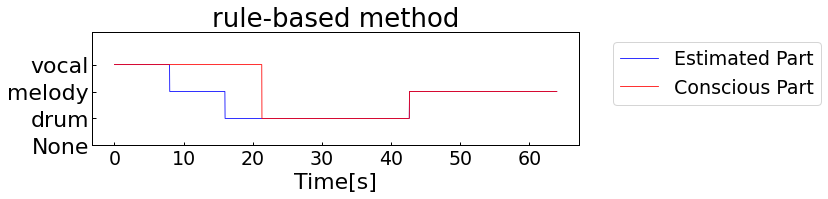

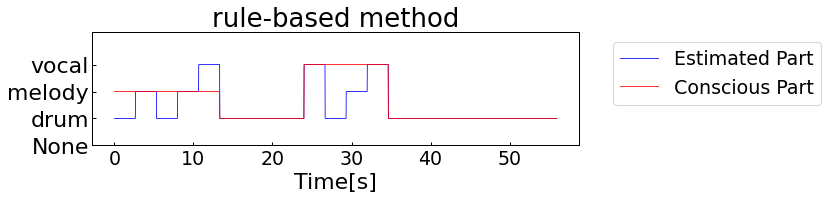

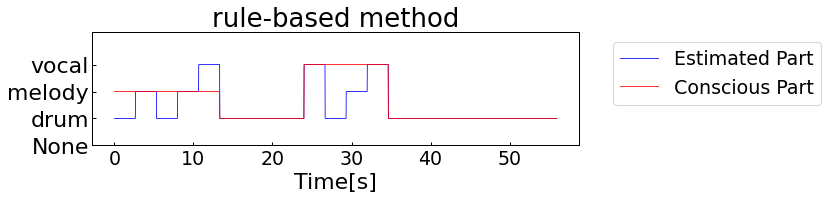

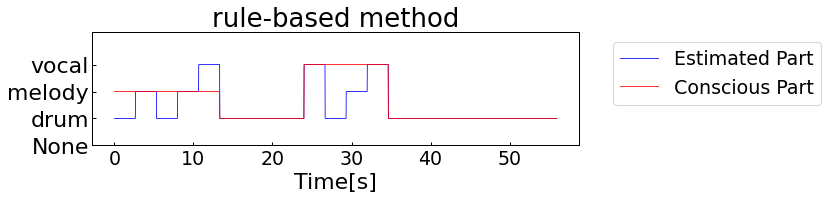

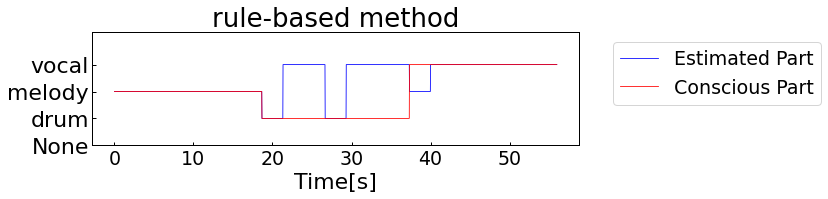

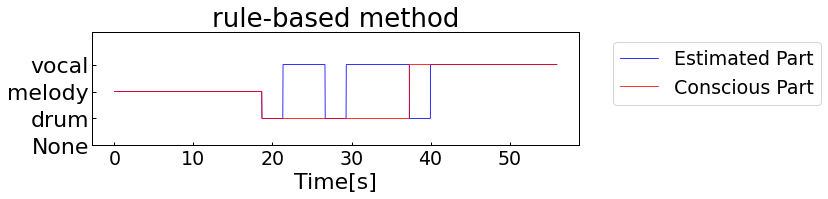

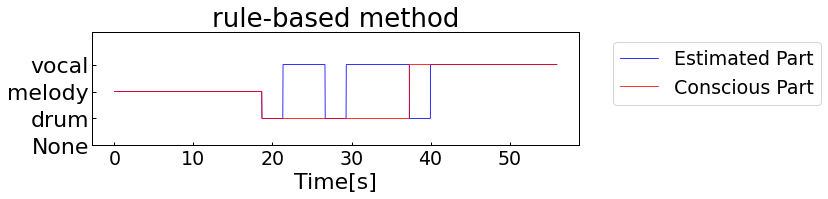

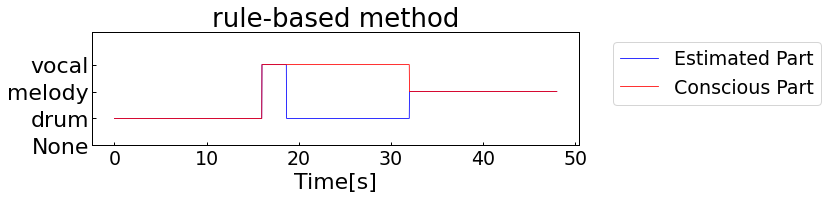

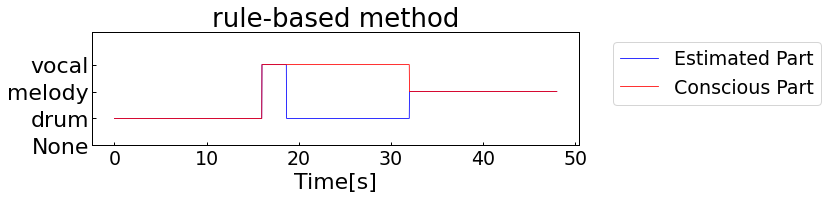

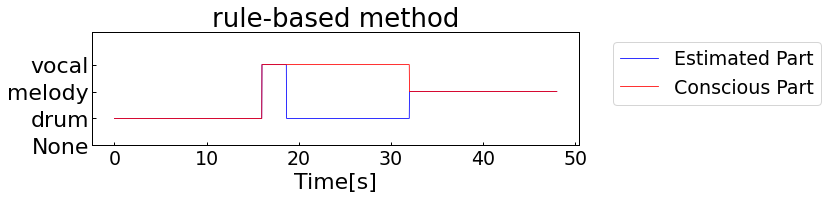

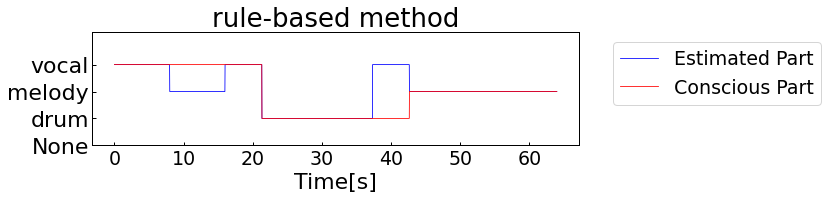

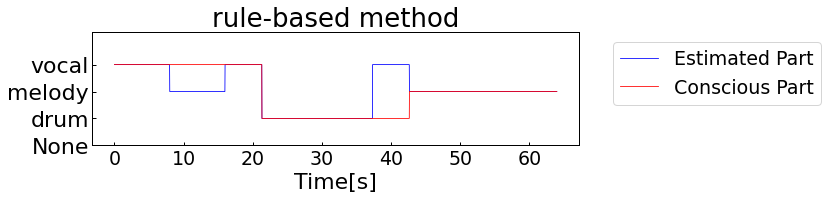

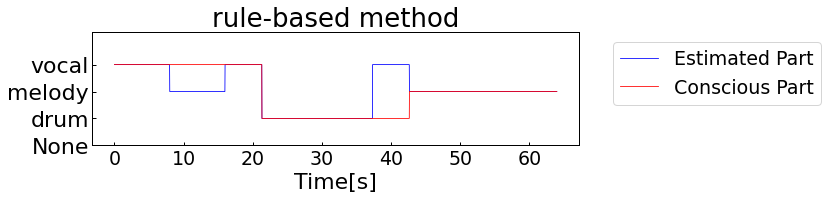

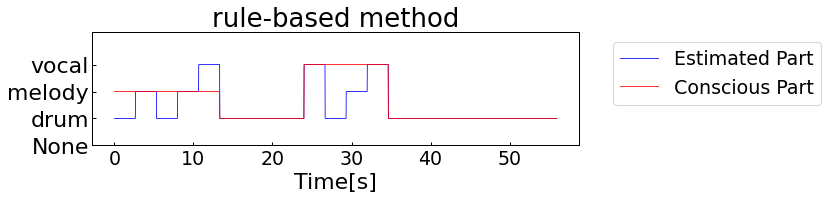

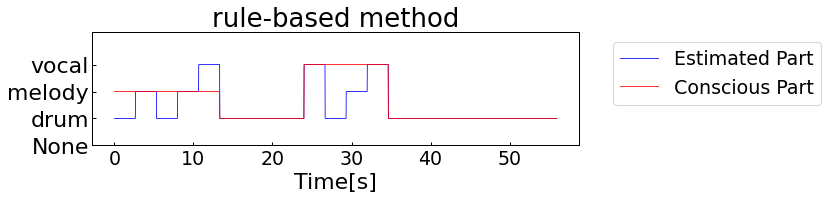

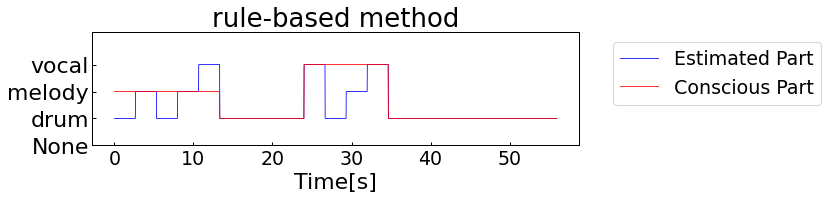

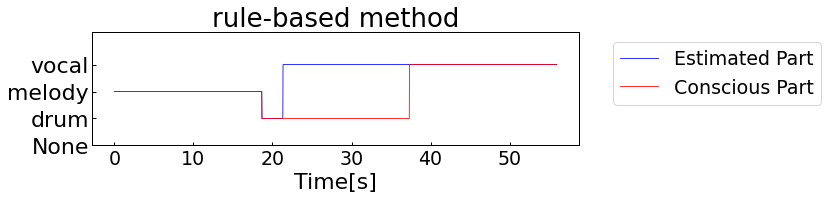

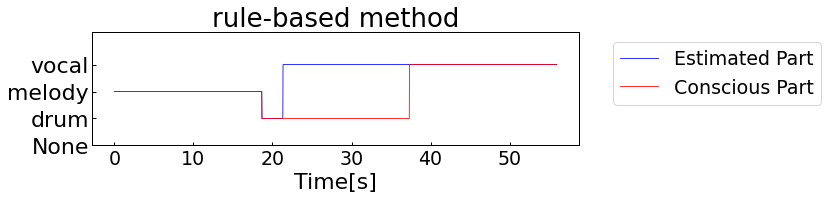

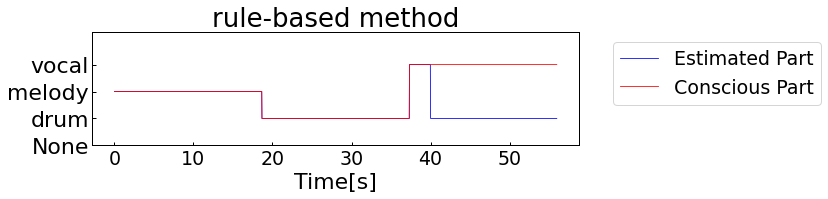

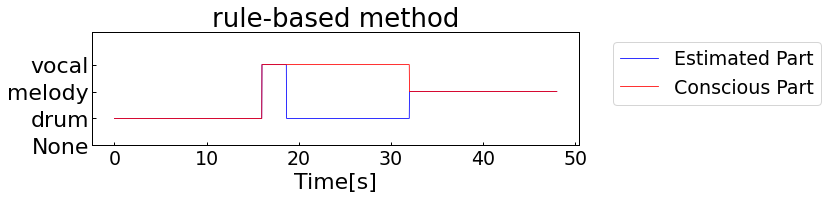

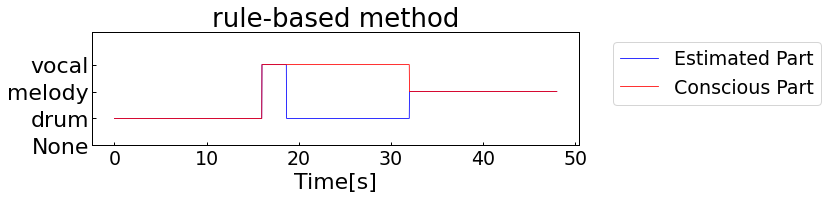

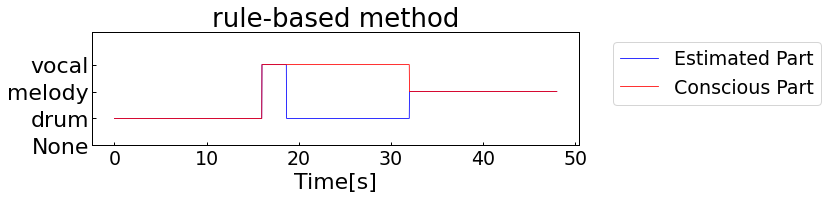

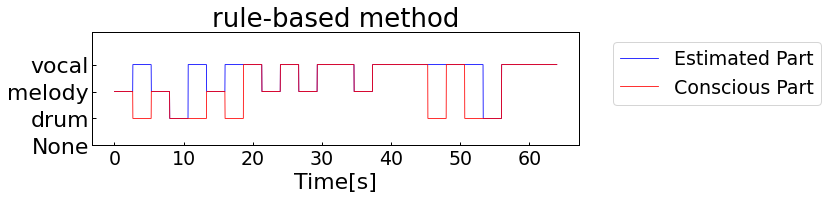

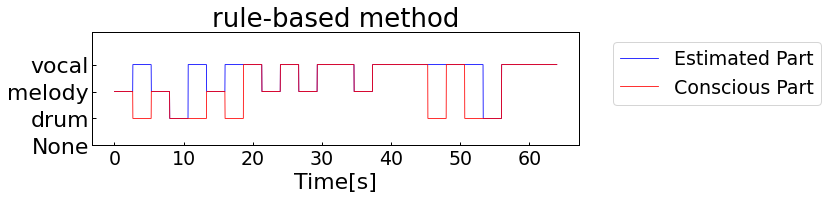

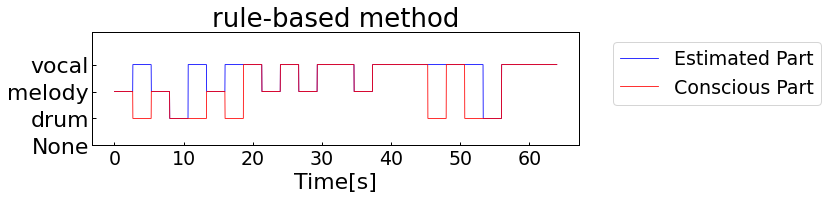

In [58]:
from itertools import permutations
for v in permutations(range(5), 2):
    b_num, e_num = v[0], v[1] 
    print(f'評価されるルール群:{list_name[b_num]}, 評価するデータ:{list_name[e_num]}')
    eval_max_list, eval_max_accuracy, eval_max_result_list, eval_max_part_list, be_evaluated_list = evaluate_rule(v_m_d_list[e_num][0], v_m_d_list[e_num][1], v_m_d_list[e_num][2], rule_lists[b_num], rule_length_lists[e_num], accuracy_lists[e_num], max_accuracy_lists[b_num])
    pickUpData(eval_max_list, eval_max_accuracy, eval_max_result_list, accuracy_lists[e_num], be_evaluated_list)
    print('#######################################################')

toshi

In [17]:
toshi_ideal_df = pd.read_csv('toshi_ideal_data.csv',skiprows=[0,1], header=None, usecols=[9, 10, 11], encoding="cp932")
toshi_ideal_df.columns=["ボーカル", "メロディ", "ドラム",]
# toshi_df.append([0,0,0])
toshi_ideal_vocals = toshi_ideal_df['ボーカル']
toshi_ideal_melodys = toshi_ideal_df['メロディ']
toshi_ideal_drums = toshi_ideal_df['ドラム']
toshi_rule_length_list = [(0, 32, 8), (32, 4, 4), (36, 128, 8)]
toshi_accuracy_data = [2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
toshi_max_list, toshi_max_accuracy, toshi_max_result_list, toshi_max_part_list = create_rule(toshi_ideal_vocals, toshi_ideal_melodys, toshi_ideal_drums, toshi_rule_length_list, toshi_accuracy_data)
# print(max_list)
print(toshi_max_accuracy[:100])

[76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619047619, 76.19047619

In [93]:
def pickUpData(max_list, max_accuracy_list, max_result_list, accuracy_data):
    max_accuracy_num = 500000
    print(max_accuracy_list[0])
    for i in range(50000):
        if max_accuracy_list[i] < max_accuracy_list[0]:
            max_accuracy_num = i
            break
    print(max_accuracy_num)
    pickUpList = [0, (max_accuracy_num+1)//2, max_accuracy_num-1]
    for num in pickUpList:
        print('number:', num)
        print('-----------------')
        for i in range(8):
            print(max_list[num][0][key_list[i]])
        print('-----------------')
        for i in range(4):
            print(max_list[num][1][i])

        
        rulebase_estimate = eval(max_result_list[num])
        print(rulebase_estimate)
        enl_rulebase_estimate = enlarge_sentence(rulebase_estimate, 100)
        enl_accuracy_data = enlarge_sentence(accuracy_data, 100)

        to_figure(
            enl_rulebase_estimate,
            enl_accuracy_data,
            enl_accuracy_data
            )

# トシの申告による正解データ

In [24]:
def to_int(parts: list):
    int_list = []
    for part in parts:
        if part == ['ボーカル']:
            int_list.append(3)
        elif part == ['メロディ']:
            int_list.append(2)
        elif part == ['ドラム']:
            int_list.append(1)
        elif part == ['None']:
            int_list.append(0)
            
    return int_list

In [21]:
toshi_accuracy_df = pd.read_csv('toshi_dance_exam.csv',skiprows=[0,1,2], header=None, usecols=[4], encoding="cp932")
toshi_accuracy_df.columns=["正解値"]
toshi_accuracy_data_csv = toshi_accuracy_df['正解値']


toshi_accuracy_data = []

for num in toshi_accuracy_data_csv:
    for _ in range(2):
        toshi_accuracy_data.append(num)
    
print(toshi_accuracy_data)


fix_toshi_accuracy_data = []
for num in toshi_accuracy_data:
    if num == 0:
        fix_toshi_accuracy_data.append(0)
    else:
        fix_toshi_accuracy_data.append(num-1)
        
print(fix_toshi_accuracy_data)

# print(len(toshi_accuracy_data))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 理想データから作成したトシのtfidf出力

In [14]:
toshi_rule_base =  toshi_rulebase_func(ideal_vocals, ideal_melodys, ideal_drums)
print(toshi_rule_base)
print(len(toshi_rule_base))

[['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['ボーカル'], ['メロディ'], ['メロディ'], ['メロディ'], ['ボーカル'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ'], ['メロディ']]
20


In [15]:
toshi_tf_idf = one_dimension_part_to_value(ideal_vocals, ideal_melodys, ideal_drums)
print(toshi_tf_idf)
print(len(toshi_tf_idf))

[['ドラム'], ['ボーカル'], ['ドラム'], ['ドラム'], ['ボーカル'], ['メロディ'], ['ドラム'], ['ドラム'], ['ボーカル'], ['メロディ'], ['ドラム'], ['ボーカル'], ['ボーカル'], ['メロディ'], ['ボーカル'], ['ドラム'], ['メロディ'], ['ドラム'], ['ドラム'], ['ドラム']]
20


# 入力データと理想のデータの比較

In [22]:
def compare_ideal_and_real(ideal_data, real_data):
    result = []
    for ideal_num, real_num in zip(ideal_data, real_data):
        if ideal_num == real_num == 1:
            result.append(1)
        elif ideal_num == real_num == 0:
            result.append(0)
        elif ideal_num == 1 and real_num == 0:
            result.append(-1)
        else:
            result.append(-2)
    return result

compare_ideal_and_real_vocals = compare_ideal_and_real(ideal_vocals, data_to_boolint_vocals)
compare_ideal_and_real_melodys = compare_ideal_and_real(ideal_melodys, data_to_boolint_melodys)
compare_ideal_and_real_drums = compare_ideal_and_real(ideal_drums, data_to_boolint_drums)

print(compare_ideal_and_real_vocals.count(-1))
print(compare_ideal_and_real_melodys.count(-1))
print(compare_ideal_and_real_drums.count(-1))


NameError: name 'data_to_boolint_vocals' is not defined

In [23]:
def data_to_boolint(body_part_music):
    result =[]
    for num in body_part_music:
        if num > 0:
            result.append(1)
        else:
            result.append(0)
        
    return result

data_to_boolint_vocals = data_to_boolint(body_part_vocals)
data_to_boolint_melodys = data_to_boolint(body_part_melodys)
data_to_boolint_drums = data_to_boolint(body_part_drums)

print(data_to_boolint_drums)

NameError: name 'body_part_vocals' is not defined

/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_4556/2363455526.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=14)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_4556/2363455526.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=14)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_4556/2363455526.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label_l, ha='right',fontsize=14)
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_4556/2363455526.py:104: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/var/folders/8f/nd3_2fsx2l1_qg33wkjdz0z00000gn/T/ipykernel_4556/2363455526.py:104: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  plt.tig

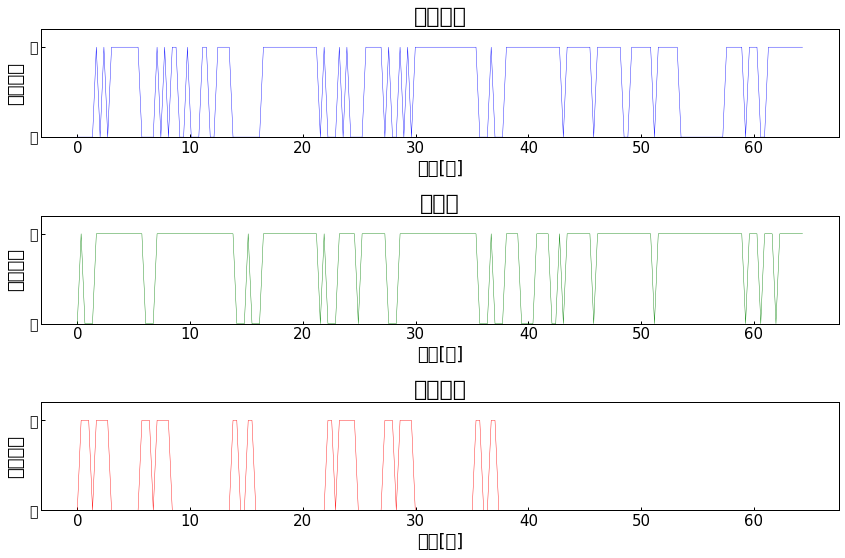

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
 
x1 = time_list

# UWW用
# y1 = del_body_part_vocals
# y2 = del_body_part_drums
# y3 = del_body_part_melodys

# y1 = body_part_vocals
# y2 = body_part_drums
# y3 = body_part_melodys

# y1 = data_to_boolint_vocals
# y2 = data_to_boolint_drums
# y3 = data_to_boolint_melodys

# y1 = compare_ideal_and_real_vocals
# y2 = compare_ideal_and_real_drums
# y3 = compare_ideal_and_real_melodys

y1 = uww2021_mix_ideal_vocals
y2 = uww2021_mix_ideal_drums
y3 = uww2021_mix_ideal_melodys
 
# plt.subplot(3,1,1)
# plt.plot(x,y1)
 
# plt.subplot(3,1,2)
# plt.plot(x,y2)

# plt.subplot(3,1,3)
# plt.plot(x,y3)
 
fig = plt.figure(figsize=(12, 8)) #...1

#図の形式定義
plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 15 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

label_l = ['', '無', '有']
# label_l = ['', 'real', 'ideal', '(0,0)', '(1,1)']
# label_l = ['', '合っていない', '(0,0)', '(1,1)']
# label_l = ['', 'メロディ', 'ドラム', 'ボーカル']

ax = fig.add_subplot(3, 1, 1)#(行，列，領域番号)
ax.plot(x1, y1,c="blue",linewidth=0.4)
# ax.plot(x1, y3,c="red",label='意識したパート',linewidth=0.4)
ax.set_xlabel('時間[秒]',fontsize=18)
ax.set_ylabel('類似条件',fontsize=18)
# ax.set_ylabel('合致度',fontsize=18)
# ax.set_ylabel('条件Sの発生回数[回]',fontsize=18)
# ax.set_yticks([-10,-5, 0,5, 10])
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
ax.set_ylim((0, 1.2))
# ax.set_ylim((-2.2, 1.2))
ax.set_title("ボーカル",fontsize=22)
ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
ax.set_yticklabels(label_l, ha='right',fontsize=14)
# ax.legend(fontsize=15)
#     ax.show()

ax = fig.add_subplot(3, 1, 2)
ax.plot(x1, y2,c="green",linewidth=0.4)
# ax.plot(x1, y3,c="red",label='意識したパート',linewidth=0.4)
ax.set_xlabel('時間[秒]',fontsize=18)
ax.set_ylabel('類似条件',fontsize=18)
# ax.set_ylabel('合致度',fontsize=18)
# ax.set_ylabel('条件Sの発生回数[回]',fontsize=18)
#     ax.set_ylabel('ang')
#     ax.set_xlim((0,14000))
ax.set_title("ドラム",fontsize=22)
ax.set_ylim((0, 1.2))
# ax.set_ylim((-2.2, 1.2))
ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
ax.set_yticklabels(label_l, ha='right',fontsize=14)
# ax.legend(fontsize=15)

ax = fig.add_subplot(3, 1, 3)
ax.plot(x1, y3,c="red",linewidth=0.4)
# ax.plot(x1, y3,c="red",label='意識したパート',linewidth=0.4)
ax.set_xlabel('時間[秒]',fontsize=18)
#     ax.set_ylabel('ang')
#     ax.set_xlim((0,14000))
ax.set_title("メロディ",fontsize=22)
ax.set_ylabel('類似条件',fontsize=18)
# ax.set_ylabel('合致度',fontsize=18)
# ax.set_ylabel('条件Sの発生回数[回]',fontsize=18)
ax.set_ylim((0, 1.2))
# ax.set_ylim((-2.2, 1.2))
ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
ax.set_yticklabels(label_l, ha='right',fontsize=14)
# ax.legend(fontsize=15)

# figname = 'uww2021_dataA_2.pdf'
plt.tight_layout()    
    
# plt.show()

### Rulebase&tf/idf

In [11]:
rulebase_df = pd.DataFrame(
    {
        "alf":rulebase_accel_leftfoot,
        "arf":rulebase_accel_rightfoot,
        "alh":rulebase_accel_lefthand,
        "arh":rulebase_accel_righthand,
        "klf":rulebase_kinect_leftfoot,
        "krf":rulebase_kinect_rightfoot,
        "klh":rulebase_kinect_lefthand,
        "krh":rulebase_kinect_righthand
    }
)
# rulebase_df["alf"]
rule_melody_idf = (rulebase_df == 'メロディ').values.sum()
rule_drum_idf = (rulebase_df == 'ドラム').values.sum()
rule_vocal_idf = (rulebase_df == 'ボーカル').values.sum()
print(rule_melody_idf, rule_drum_idf, rule_vocal_idf)



312 219 594


In [28]:
i = 0
rule_tfidf_part = []
while i < len(rulebase_df)-7:
    rule_max_score_part = []
    rulebase_measure = rulebase_df[i:i+8]
    
    rule_melody_tf = (rulebase_measure == 'メロディ').values.sum()
    rule_drum_tf = (rulebase_measure == 'ドラム').values.sum()
    rule_vocal_tf = (rulebase_measure == 'ボーカル').values.sum()
#     print(rule_melody_tf, rule_drum_tf, rule_vocal_tf)

    rule_melody_tfidf = float(rule_melody_tf / rule_melody_idf)
    rule_drum_tfidf = float(rule_drum_tf / rule_drum_idf)
    rule_vocal_tfidf = float(rule_vocal_tf / rule_vocal_idf)
#     print(rule_melody_tfidf, rule_drum_tfidf, rule_vocal_tfidf)
    rule_max_score = max(rule_melody_tfidf, rule_drum_tfidf, rule_vocal_tfidf)
#     print(rule_max_score)
    if rule_max_score == 0:
        rule_max_score_part.append("なし")
    if rule_max_score == rule_vocal_tfidf:
        rule_max_score_part.append("ボーカル")
    if rule_max_score == rule_melody_tfidf:
        rule_max_score_part.append("メロディ")
    if rule_max_score == rule_drum_tfidf:
        rule_max_score_part.append("ドラム")

    rule_tfidf_part.append(rule_max_score_part)
    i += 8
print(rule_tfidf_part)
rule_tfidf_part_copy = rule_tfidf_part.copy()
del rule_tfidf_part_copy[23]
del rule_tfidf_part_copy[15]
del rule_tfidf_part_copy[7]
print(len(rule_tfidf_part_copy))
tf_idf_concious_part = make_concious_part(7, "two")
value_rule_tf_idf_concious_part = part_to_value(tf_idf_concious_part,tf_idf_concious_part)
enl_value_tf_idf_concious_part = enlarge_sentence(value_tf_idf_concious_part,100)
value_rule_tfidf_body_part = part_to_value(rule_tfidf_part_copy,tf_idf_concious_part)
enl_value_rule_tfidf_body_part = enlarge_sentence(value_rule_tfidf_body_part,100)

[['メロディ'], ['ドラム'], ['ボーカル'], ['ドラム'], ['ボーカル'], ['ボーカル'], ['ボーカル'], ['ドラム'], ['メロディ'], ['ボーカル'], ['ドラム'], ['ボーカル'], ['ボーカル'], ['ボーカル'], ['メロディ'], ['メロディ'], ['ドラム'], ['ドラム'], ['ドラム'], ['メロディ'], ['ボーカル'], ['メロディ'], ['メロディ'], ['ドラム']]
21


## to_csv

In [16]:
df = pd.DataFrame(
    {
        'time': halftime_list,
        'accel_leftfoot': enl_value_accel_leftfoot,
        'kinect_leftfoot': enl_value_kinect_leftfoot,
        'accel_lefthand': enl_value_accel_lefthand,
        'kinect_lefthand': enl_value_kinect_lefthand,
        'accel_rightfoot': enl_value_accel_rightfoot,
        'kinect_rightfoot': enl_value_kinect_rightfoot,
        'accel_righthand': enl_value_accel_righthand,     
        'kinect_righthand': enl_value_kinect_righthand,
        'value_concious_part' : enl_value_concious_part,
    }
)
df

NameError: name 'halftime_list' is not defined

## 図

In [46]:
def to_figure(rulebase_estimated_part,tfidf_estimated_part, concious_part):
    data_length = len(rulebase_estimated_part)
    figure_time_list = []
    for i in range(data_length):
        figure_time_list.append(i * 16 * quarter_count / 100)
#         figure_time_list.append(i * 16 * quarter_count / 100)
#     print(time_list)
#     df1 = df1.astype(float)
    x1 = figure_time_list
    y1 = rulebase_estimated_part
    y2 = tfidf_estimated_part
    y3 = concious_part


    # Figureの初期化
    fig = plt.figure(figsize=(12, 5)) #...1

    #図の形式定義
    plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['font.size'] = 19 #フォントの大きさ
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
#     label_l = ['','drum', 'melody', 'vocal']
    label_l = ['None', 'drum', 'melody', 'vocal']
#     label_l = ['', 'melody', 'drum', 'vocal']

    ax = fig.add_subplot(2, 1, 1)#(行，列，領域番号)
    ax.plot(x1, y1,c="blue",label='Estimated Part',linewidth=0.8)
    ax.plot(x1, y3,c="red",label='Conscious Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 4.2))
    ax.set_title("rule-based method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)
#     ax.show()

#     ax = fig.add_subplot(2, 1, 2)
#     ax.plot(x1, y2,c="green",label='Estimated Part',linewidth=0.8)
#     ax.plot(x1, y3,c="red",label='Conscious Part',linewidth=0.8)
#     ax.set_xlabel('Time[s]',fontsize=22)
# #     ax.set_ylabel('ang')
# #     ax.set_xlim((0,14000))
#     ax.set_title("tf/idf method",fontsize=26)
#     ax.set_ylim((0, 4.2))
#     ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
#     ax.set_yticklabels(label_l, ha='right',fontsize=22)
#     ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=19)

    figname = 'uww2021_dataA_3.pdf'
    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.savefig(figname)
#     files.download(figname)

In [16]:
# def to_figure_ruletfidf(rulebase_tfidf_estimated_part, concious_part):
#     data_length = len(rulebase_tfidf_estimated_part)
#     figure_time_list = []
#     for i in range(data_length):
#         figure_time_list.append(i * 8 * half_count / 100)
# #     print(time_list)
# #     df1 = df1.astype(float)
#     x1 = figure_time_list
#     y1 = rulebase_tfidf_estimated_part
#     y2 = concious_part


#     # Figureの初期化
#     fig = plt.figure(figsize=(12, 8)) #...1

#     #図の形式定義
#     plt.rcParams['font.family'] ='MS Gothic'#使用するフォント
#     plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#     plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#     plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
#     plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
#     plt.rcParams['font.size'] = 15 #フォントの大きさ
#     plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
#     label_l = ['推定なし', 'メロディ', 'ドラム', 'ボーカル']

# #     ax = fig.add_subplot(2, 1, 1)#(行，列，領域番号)
#     plt.plot(x1, y1,c="blue",label='推定されたパート',linewidth=0.8)
#     plt.plot(x1, y2,c="red",label='意識したパート',linewidth=0.8)
#     plt.set_xlabel('時間[秒]',fontsize=18)
# #     ax.set_ylabel('acc')
# #     ax.set_xlim((0,14000))
#     plt.set_ylim((0, 4.2))
#     plt.set_title("ルールベース",fontsize=18)
#     plt.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
#     plt.set_yticklabels(label_l, ha='right',fontsize=18)
#     plt.legend(fontsize=15)
#     plt.show()

# #     ax = fig.add_subplot(2, 1, 2)
# #     ax.plot(x1, y2,c="green",label='推定されたパート',linewidth=0.4)
# #     ax.plot(x1, y3,c="red",label='意識したパート',linewidth=0.4)
# #     ax.set_xlabel('時間[秒]',fontsize=18)
# # #     ax.set_ylabel('ang')
# # #     ax.set_xlim((0,14000))
# #     ax.set_title("tf-idf",fontsize=22)
# #     ax.set_ylim((0, 4.2))
# #     ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
# #     ax.set_yticklabels(label_l, ha='right',fontsize=18)
# #     ax.legend(fontsize=15)

#     figname = 'uww2021_dataA_3.pdf'
#     plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
#     plt.savefig(figname)
# #     files.download(figname)

In [167]:
point = 3
level = 10000

def upgrade(current_level: int, use_point: int) -> int:
    upgrade_level = int(current_level + current_level * use_point / 100)
    return upgrade_level

def calculate_point(level, point):
    
    point_lists = list(range(1, point+1))
    times = [int(point / n) for n in point_lists]
    lefts = [point % n for n in point_lists]
    level_list = []
    for point_list,time,left in zip(point_lists, times, lefts):
        upgrade_level = level
        print(point_list, time, left)
        for _ in range(time):
            upgrade_level = upgrade(upgrade_level, point_list)
        if left > 0:
            for _ in range(1,left+1):
                add_level_1 = upgrade(upgrade_level, 1)
            add_level_2 = upgrade(upgrade_level, left)
            add_level = max(add_level_1, add_level_2)
            upgrade_level = add_level
        level_list.append(upgrade_level)
    return max(level_list)
a = calculate_point(level, point)
print(a)

1 3 0
2 1 1
3 1 0
10303
